In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve

## Problem 1:

In [2]:
df = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
df.shape

(1525, 10)

In [6]:
df = df.drop('Unnamed: 0',axis=1)

In [7]:
print('The Number of dupicates is :',df.duplicated().sum())

The Number of dupicates is : 8


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print('The Number of dupicates is :',df.duplicated().sum())

The Number of dupicates is : 0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [11]:
df.shape

(1517, 9)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [13]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [14]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [15]:
df.vote.value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [16]:
df.gender.value_counts()

female    808
male      709
Name: gender, dtype: int64

In [17]:
df[~df.applymap(np.isrealobj).all(1)]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [18]:
df = df.rename(columns={'economic.cond.national':'national_economic_cond','economic.cond.household':'household_economic_cond',
          'political.knowledge':'political_knowledge'})

In [19]:
df.head()

,vote,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [20]:
df.shape

(1517, 9)

In [21]:
df.skew()

age                        0.139800
national_economic_cond    -0.238474
household_economic_cond   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political_knowledge       -0.422928
dtype: float64

### Univariate Analysis

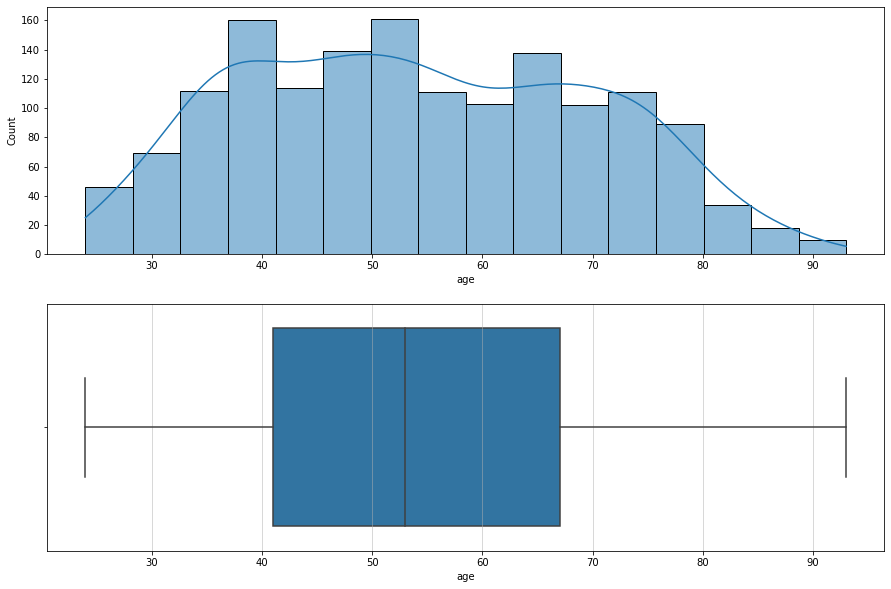

In [22]:
f,a=plt.subplots(2,1,figsize=(15,10))
sns.histplot(df['age'],kde=True,ax=a[0])
sns.boxplot(x=df.age,ax=a[1])
plt.grid(alpha=100,axis='x');

In [23]:
df.national_economic_cond.value_counts()

3    604
4    538
2    256
5     82
1     37
Name: national_economic_cond, dtype: int64

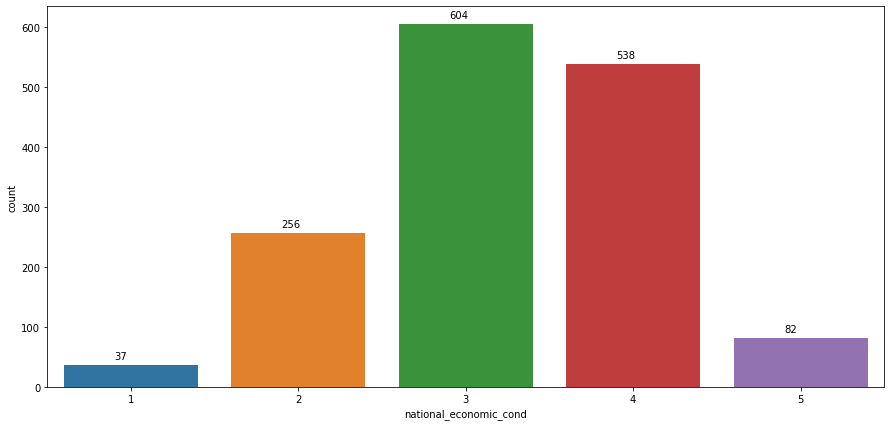

In [24]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.national_economic_cond);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

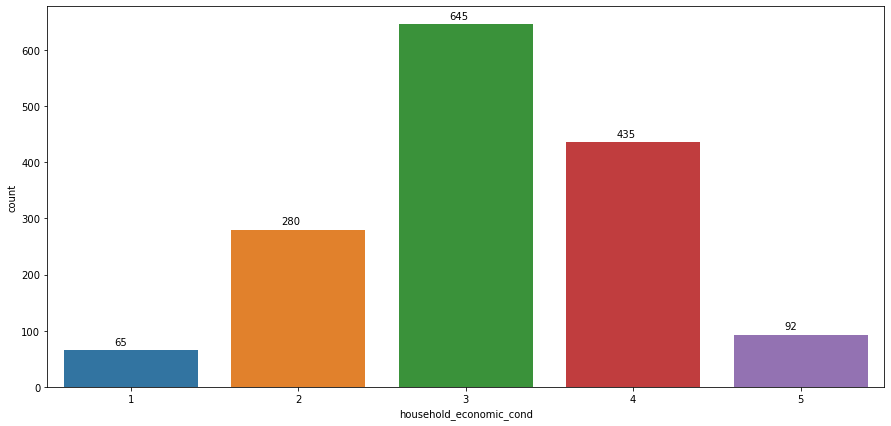

In [25]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.household_economic_cond)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

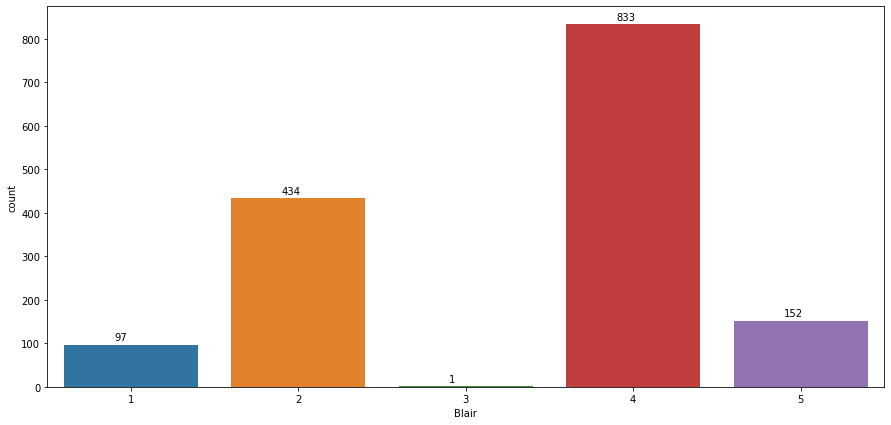

In [26]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.Blair)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

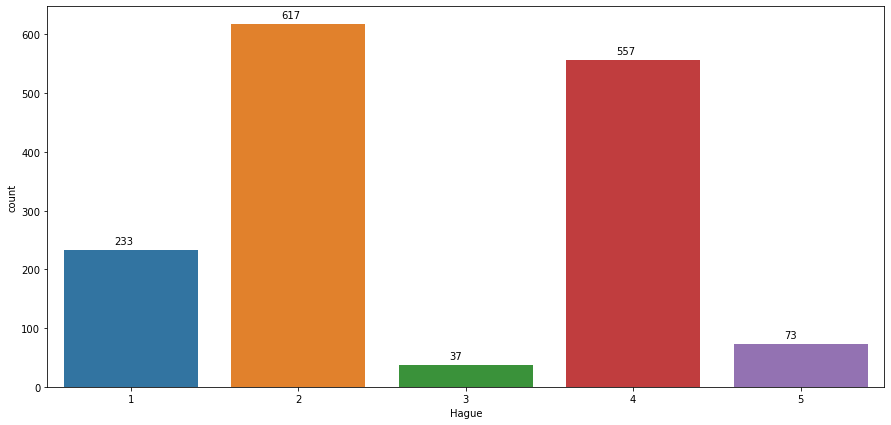

In [27]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.Hague)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

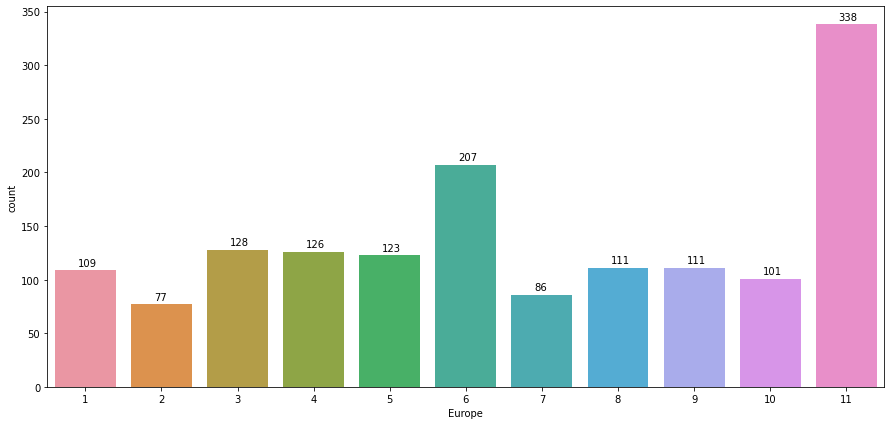

In [28]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.Europe)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+4))
plt.show()

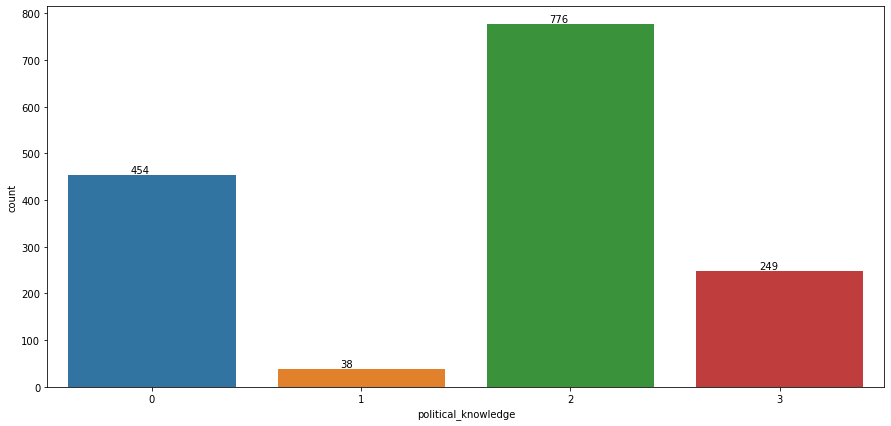

In [29]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.political_knowledge)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+4))
plt.show()

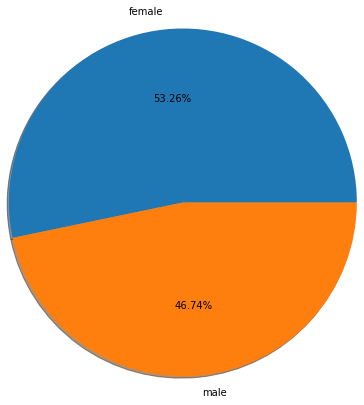

In [30]:
plt.pie(df.gender.value_counts(),autopct='%.2f%%',labels=df.gender.value_counts().index,radius=2,shadow=True);

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   national_economic_cond   1517 non-null   int64 
 3   household_economic_cond  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political_knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 150.8+ KB


### Bivariate Analysis

In [32]:
pd.crosstab(df.gender,df.vote,margins=True)

vote,Conservative,Labour,All
gender,,,
female,257,551,808
male,203,506,709
All,460,1057,1517


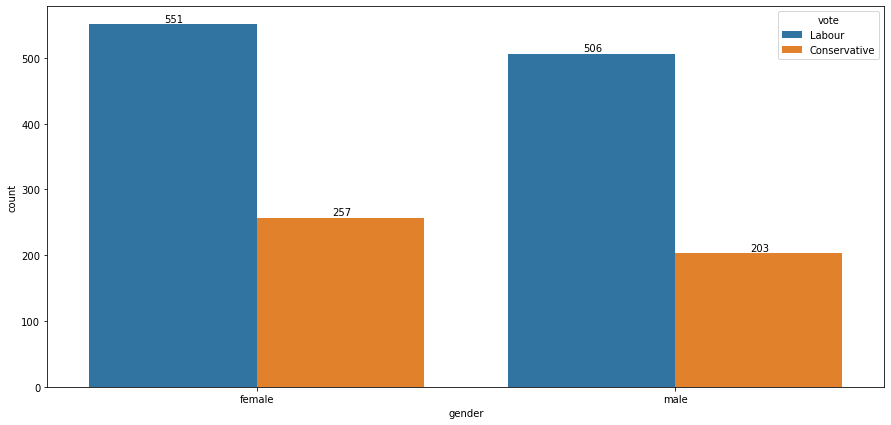

In [33]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.gender,hue=df.vote)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+4))
plt.show()

In [34]:
pd.crosstab(df.vote,df.national_economic_cond,margins=True)

national_economic_cond,1,2,3,4,5,All
vote,,,,,,
Conservative,21,140,199,91,9,460
Labour,16,116,405,447,73,1057
All,37,256,604,538,82,1517


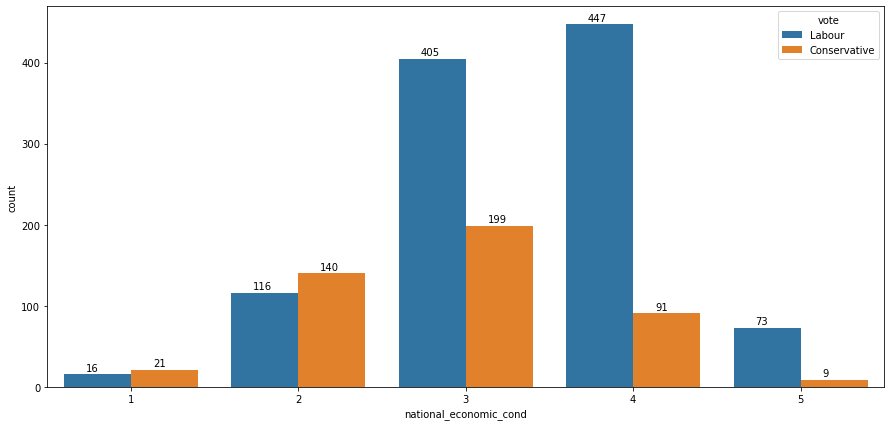

In [35]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.national_economic_cond,hue=df.vote)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+4))
plt.show()

In [36]:
pd.crosstab(df.vote,df.household_economic_cond,margins=True)

household_economic_cond,1,2,3,4,5,All
vote,,,,,,
Conservative,28,126,197,86,23,460
Labour,37,154,448,349,69,1057
All,65,280,645,435,92,1517


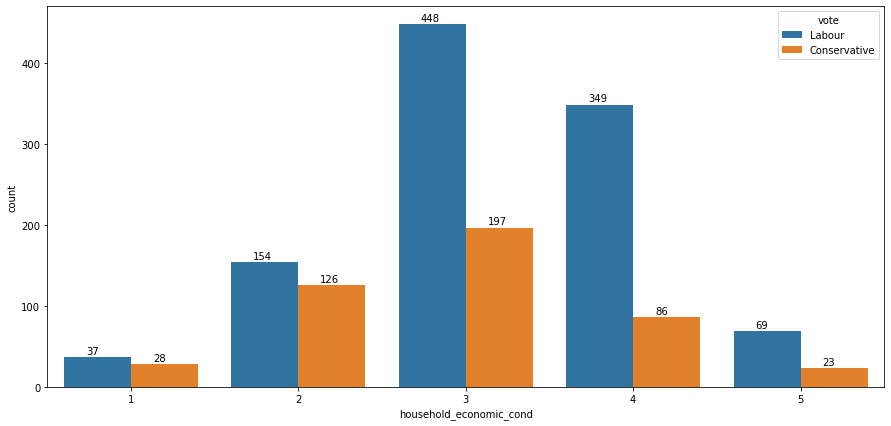

In [37]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.household_economic_cond,hue=df.vote)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+4))
plt.show()

In [38]:
pd.crosstab(df.vote,df.Europe,margins=True)

Europe,1,2,3,4,5,6,7,8,9,10,11,All
vote,,,,,,,,,,,,
Conservative,5,6,14,18,20,35,32,48,56,54,172,460
Labour,104,71,114,108,103,172,54,63,55,47,166,1057
All,109,77,128,126,123,207,86,111,111,101,338,1517


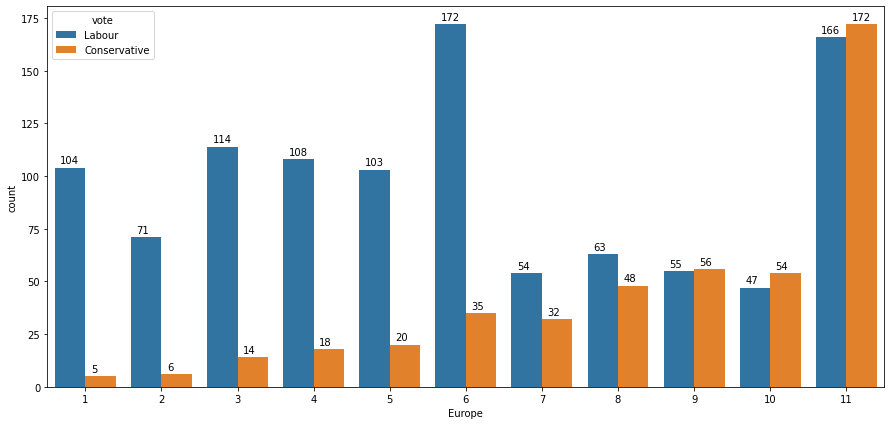

In [39]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.Europe,hue=df.vote)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+2))
plt.show()

In [40]:
pd.crosstab(df.vote,df.Blair,margins=True)

Blair,1,2,3,4,5,All
vote,,,,,,
Conservative,59,240,1,157,3,460
Labour,38,194,0,676,149,1057
All,97,434,1,833,152,1517


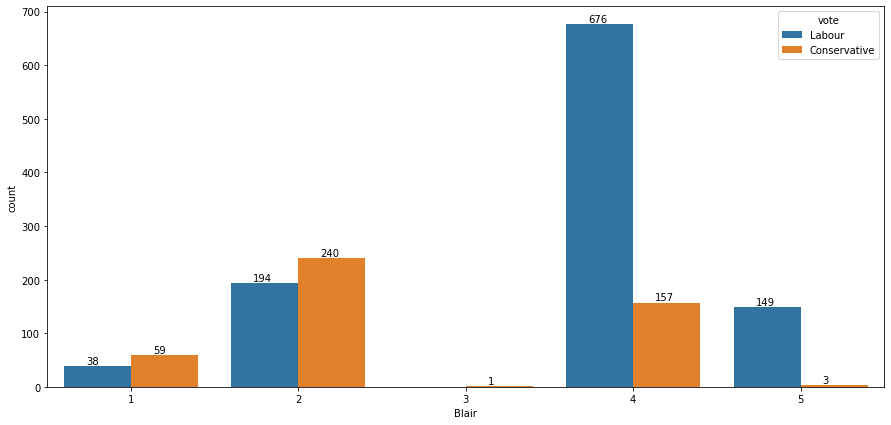

In [41]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.Blair,hue=df.vote)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+4))
plt.show()

In [42]:
pd.crosstab(df.vote,df.Hague,margins=True)

Hague,1,2,3,4,5,All
vote,,,,,,
Conservative,11,95,9,286,59,460
Labour,222,522,28,271,14,1057
All,233,617,37,557,73,1517


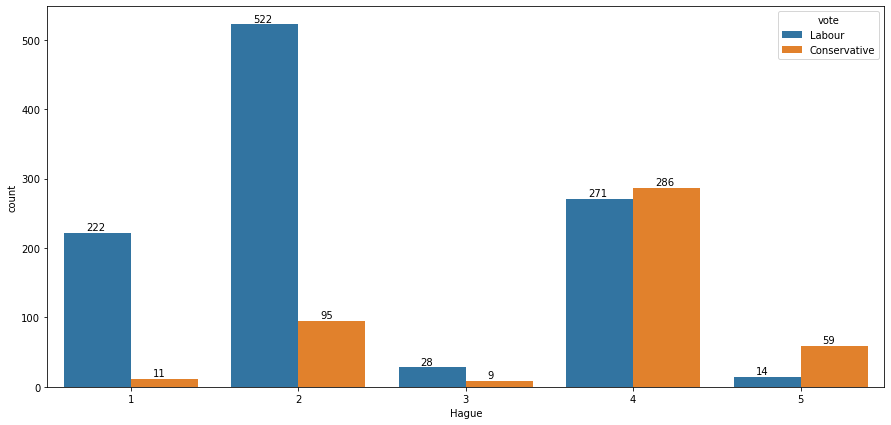

In [43]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.Hague,hue=df.vote)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+4))
plt.show()

In [44]:
pd.crosstab(df.vote,df.political_knowledge,margins=True)

political_knowledge,0,1,2,3,All
vote,,,,,
Conservative,94,11,283,72,460
Labour,360,27,493,177,1057
All,454,38,776,249,1517


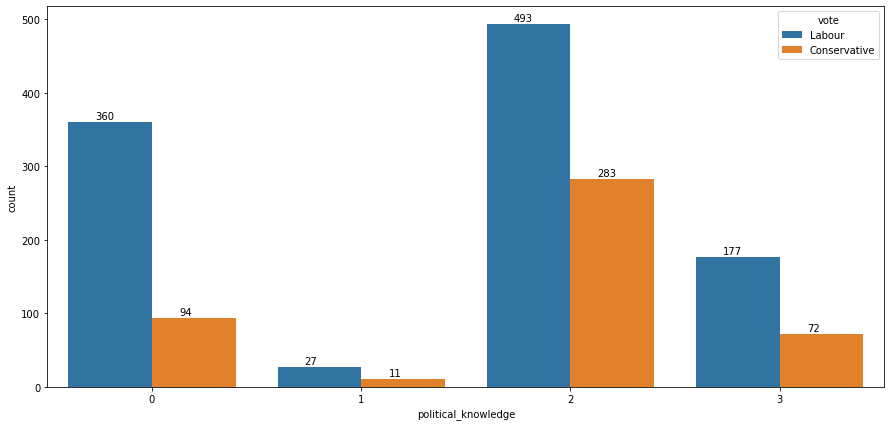

In [45]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x=df.political_knowledge,hue=df.vote)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+4))
plt.show()

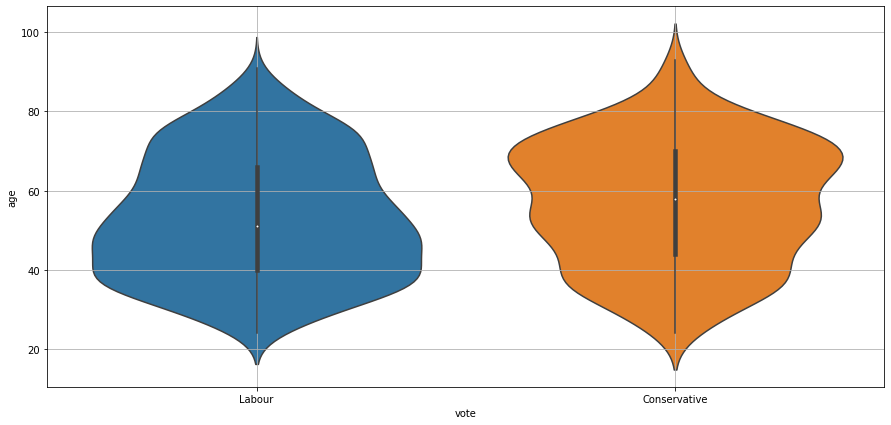

In [46]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df.vote,y=df.age);
plt.grid()

### Multivariate Analysis

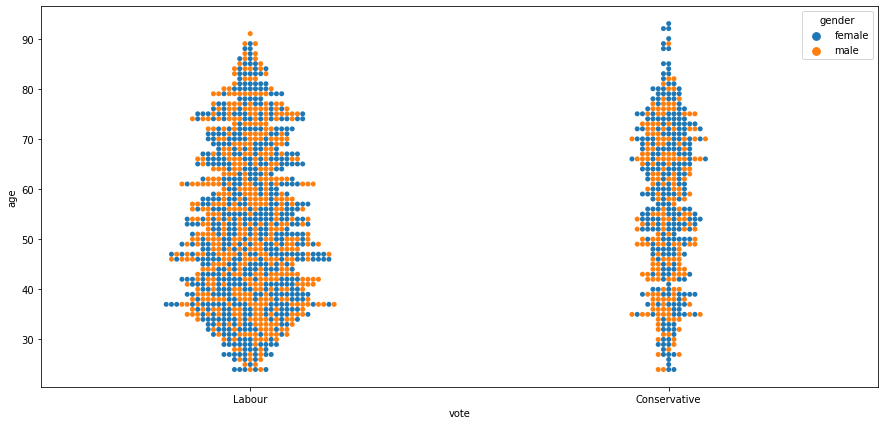

In [47]:
plt.figure(figsize=(15,7))
sns.swarmplot(x=df.vote,y=df.age,hue=df.gender);

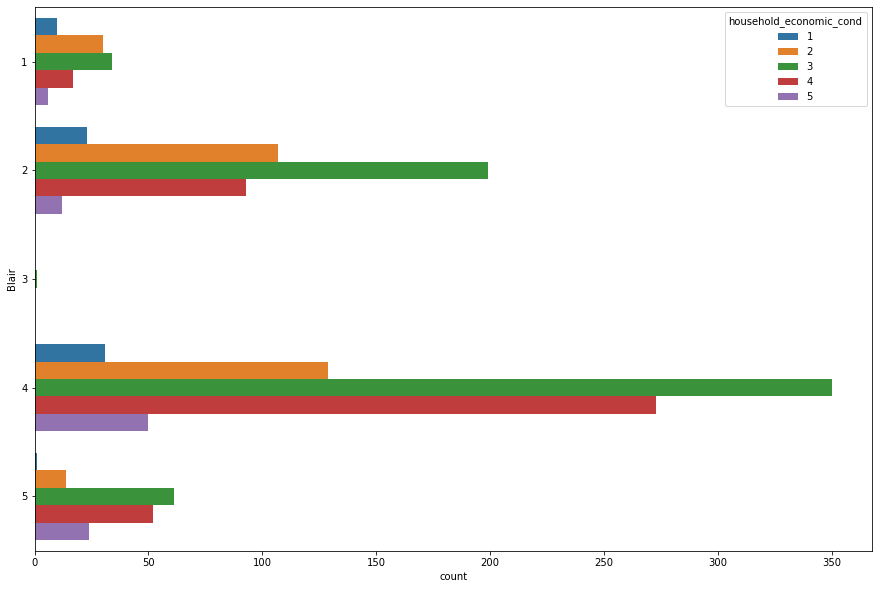

In [48]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y=df.Blair,hue=df.household_economic_cond)

<AxesSubplot:xlabel='count', ylabel='Hague'>

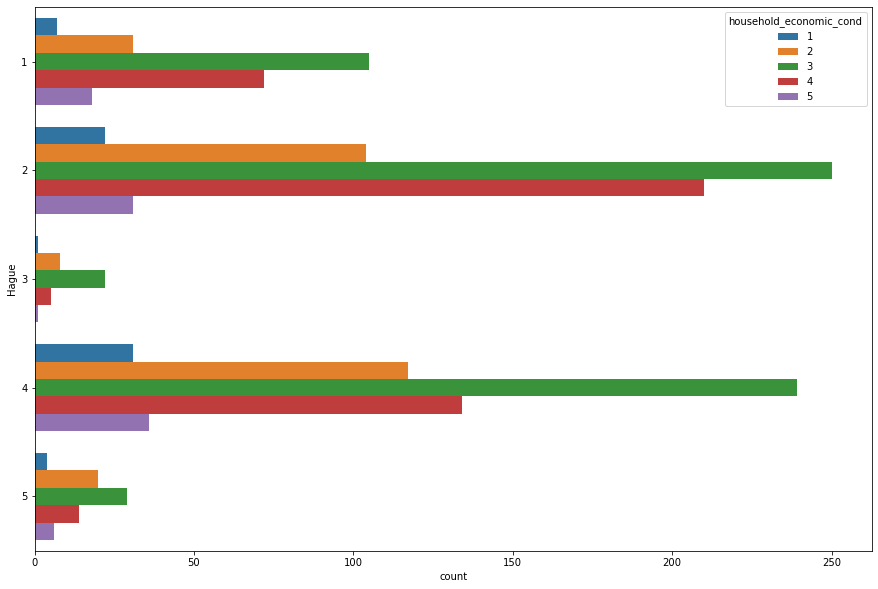

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(y=df.Hague,hue=df.household_economic_cond)

<AxesSubplot:xlabel='count', ylabel='Blair'>

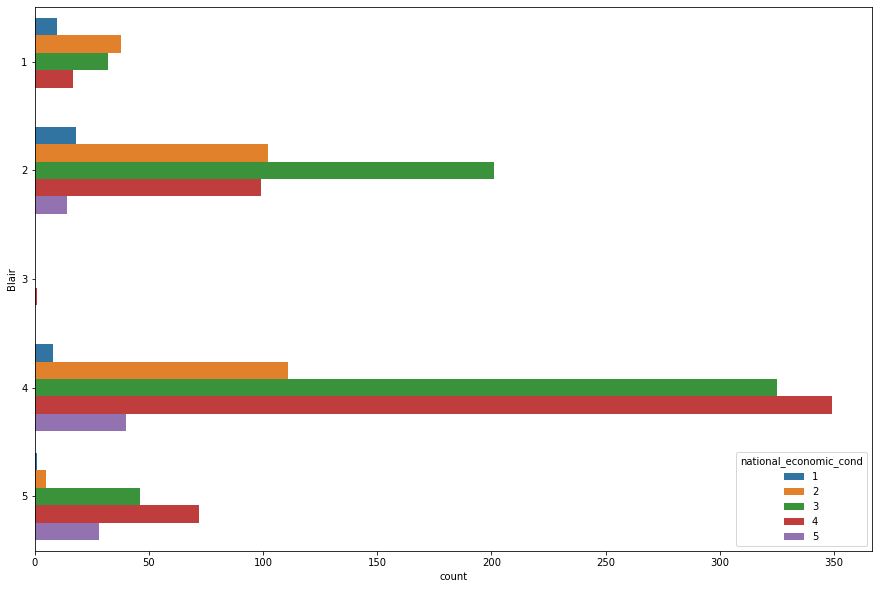

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(y=df.Blair,hue=df.national_economic_cond)

<AxesSubplot:xlabel='count', ylabel='Hague'>

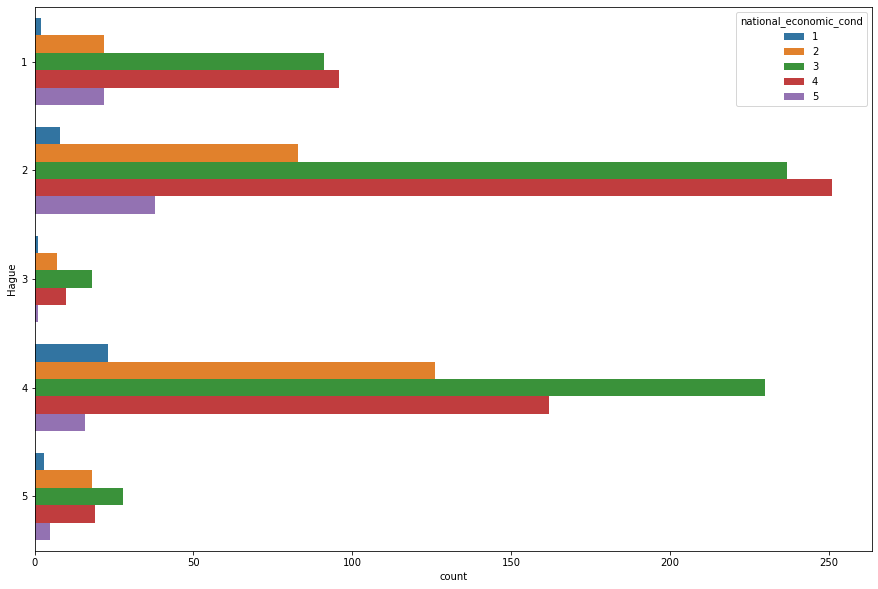

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(y=df.Hague,hue=df.national_economic_cond)

<AxesSubplot:xlabel='count', ylabel='Hague'>

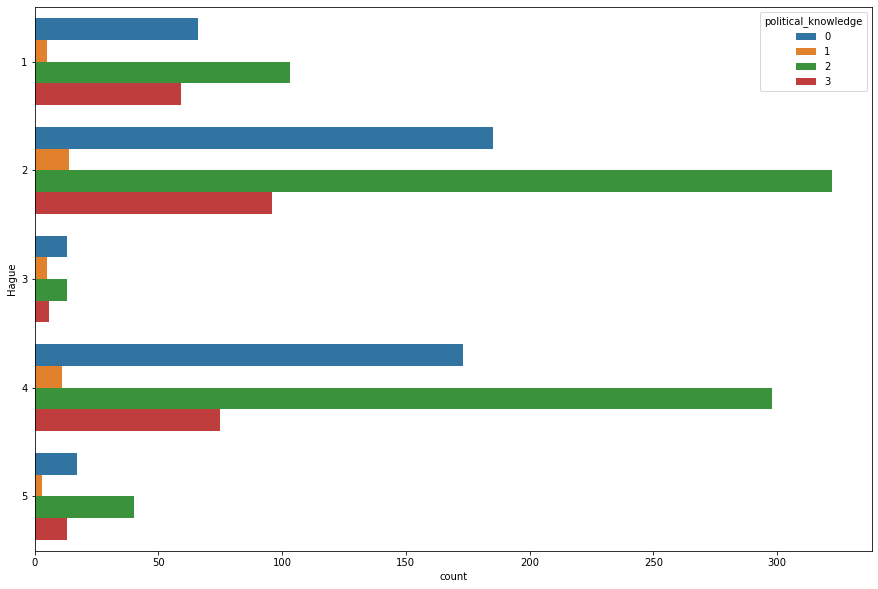

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(y=df.Hague,hue=df.political_knowledge)

<AxesSubplot:xlabel='count', ylabel='Blair'>

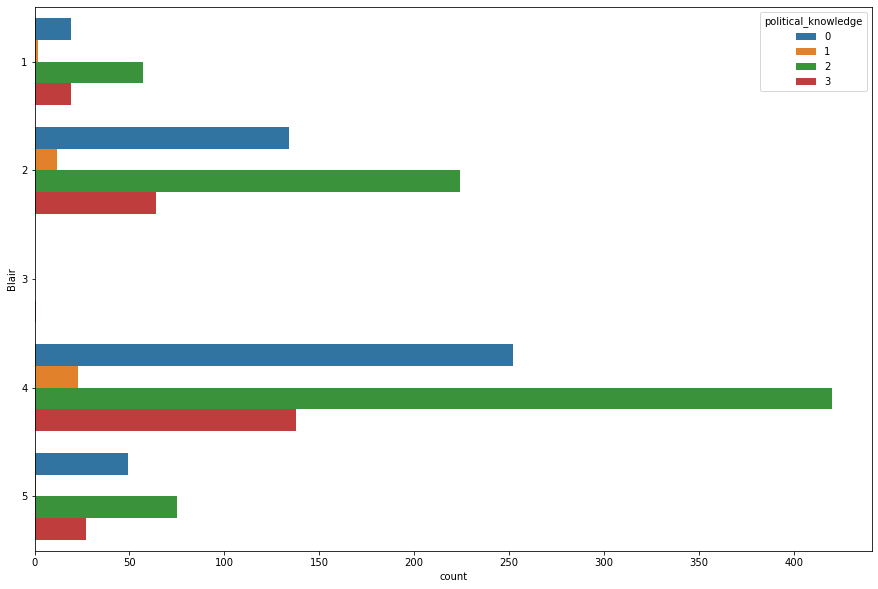

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(y=df.Blair,hue=df.political_knowledge)

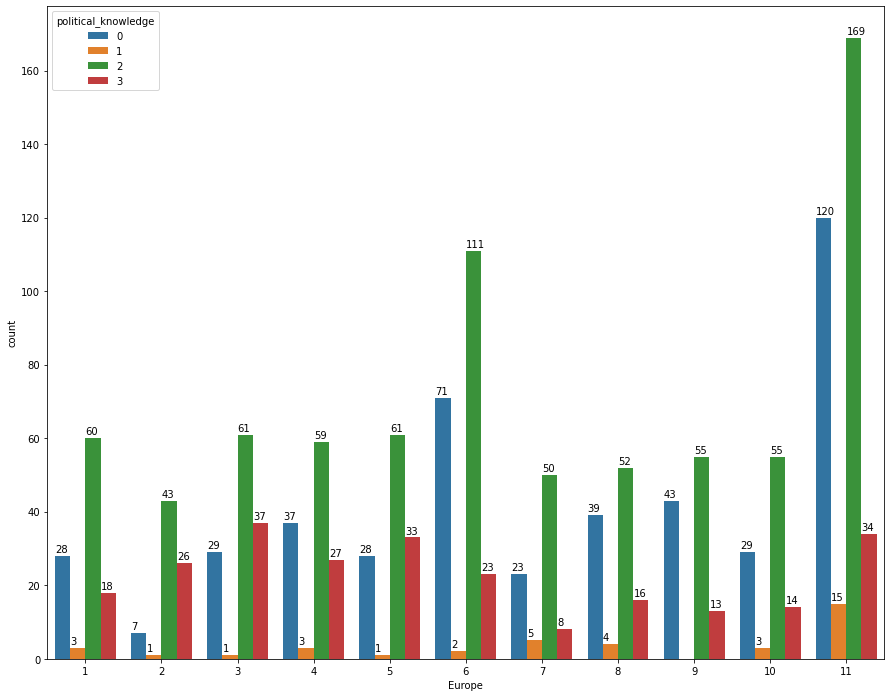

In [54]:
plt.figure(figsize=(15,12))
ax = sns.countplot(x=df.Europe,hue=df.political_knowledge)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.002, p.get_height()+1))
plt.show()

<AxesSubplot:xlabel='political_knowledge', ylabel='age'>

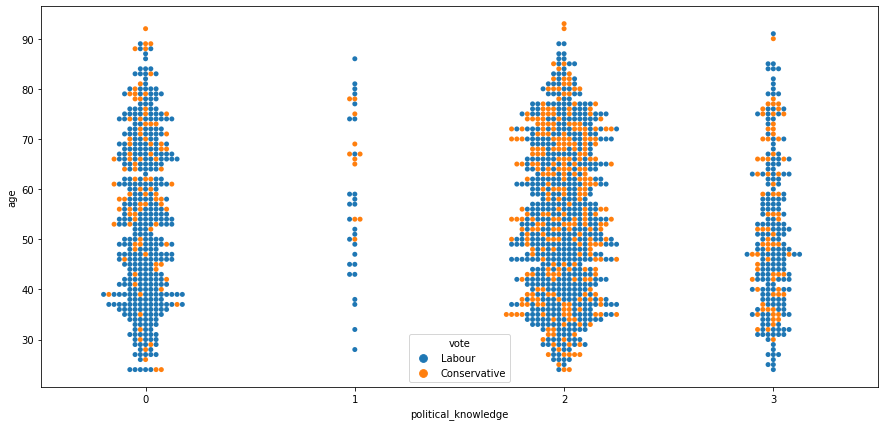

In [55]:
plt.figure(figsize=(15,7))
sns.swarmplot(y=df.age,x=df.political_knowledge,hue=df.vote)

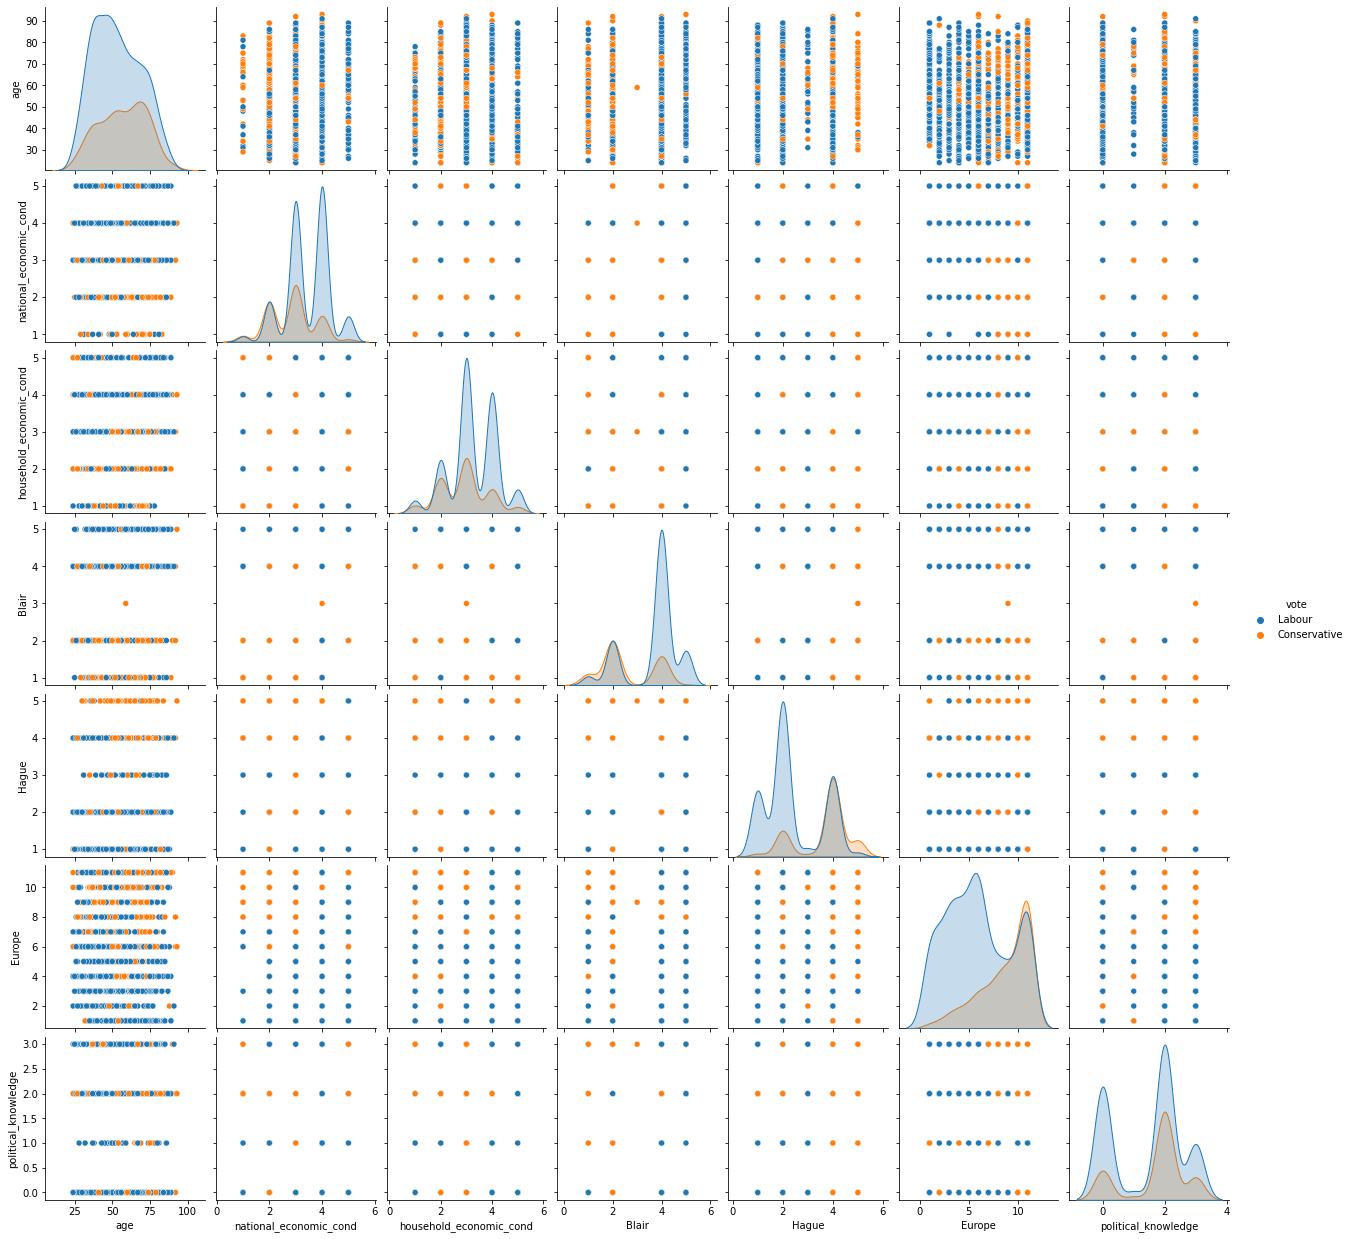

In [56]:
sns.pairplot(df,diag_kind='kde',hue='vote')

In [57]:
df.corr()

,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
national_economic_cond,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
household_economic_cond,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political_knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


<AxesSubplot:>

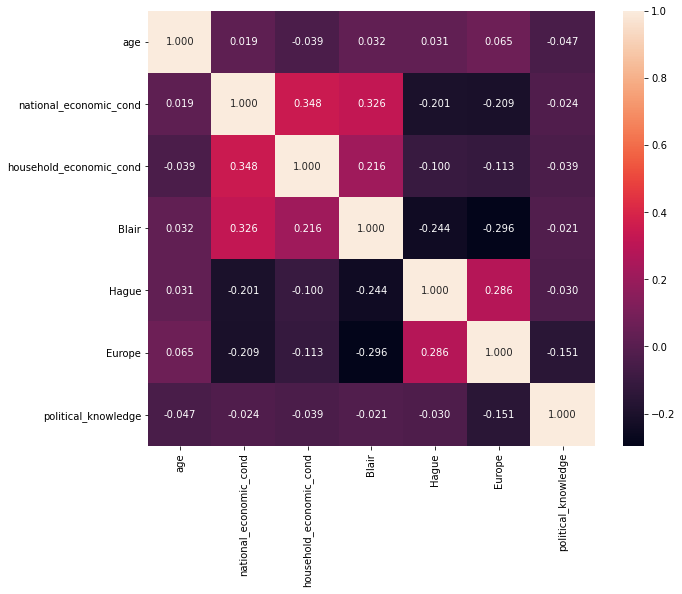

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.3f')

In [59]:
df.dtypes

vote                       object
age                         int64
national_economic_cond      int64
household_economic_cond     int64
Blair                       int64
Hague                       int64
Europe                      int64
political_knowledge         int64
gender                     object
dtype: object

### Outlier checks

<AxesSubplot:>

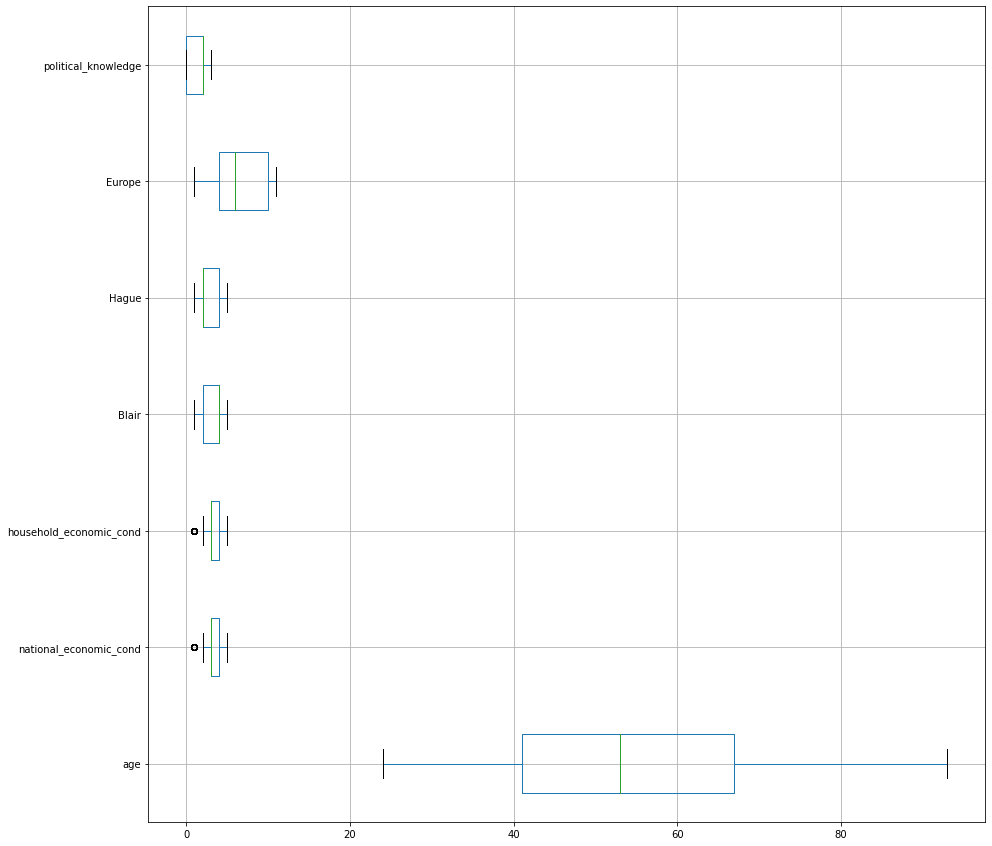

In [60]:
df.boxplot(vert=0,figsize=(15,15))

In [61]:
#No outlier treatment needed.

### Encoding the data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   national_economic_cond   1517 non-null   int64 
 3   household_economic_cond  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political_knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 150.8+ KB


In [63]:
df = pd.get_dummies(data=df,columns=['vote','gender'],drop_first=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   national_economic_cond   1517 non-null   int64
 2   household_economic_cond  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political_knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 130.1 KB


In [65]:
df.rename(columns={'vote_Labour':'vote','gender_male':'gender'},inplace=True)

In [66]:
df.head()

,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge,vote,gender
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [67]:
df.gender.value_counts()

0    808
1    709
Name: gender, dtype: int64

In [68]:
df.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

### Data Splitting 

In [69]:
X = df.drop('vote',axis=1)
y = df['vote']

In [70]:
y.value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [72]:
X_train.head()

,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge,gender
533,71,3,3,4,2,11,0,0
708,57,4,5,4,1,3,2,0
1144,24,3,4,2,4,11,0,1
1081,43,4,4,2,3,5,0,1
957,37,3,2,4,2,7,2,1


In [73]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: uint8

In [74]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


In [75]:
y_train.value_counts(normalize=True)

1    0.696513
0    0.303487
Name: vote, dtype: float64

In [76]:
y_test.value_counts(normalize=True)

1    0.697368
0    0.302632
Name: vote, dtype: float64

### Scaling the data

In [77]:
#Scaling could be helpful witrh KNN as it uses distance based algothims

In [78]:
X_train.head()

,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge,gender
533,71,3,3,4,2,11,0,0
708,57,4,5,4,1,3,2,0
1144,24,3,4,2,4,11,0,1
1081,43,4,4,2,3,5,0,1
957,37,3,2,4,2,7,2,1


In [79]:
Xtr_sc = X_train.copy(deep=True)

In [80]:
Xtest_sc = X_test.copy(deep=True)

In [81]:
Xtr_sc.head()

,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge,gender
533,71,3,3,4,2,11,0,0
708,57,4,5,4,1,3,2,0
1144,24,3,4,2,4,11,0,1
1081,43,4,4,2,3,5,0,1
957,37,3,2,4,2,7,2,1


In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
mms = MinMaxScaler(feature_range=(1,5))

In [84]:
Xtr_sc[['age','Europe']] = mms.fit_transform(Xtr_sc[['age','Europe']])

In [85]:
Xtr_sc.head()

,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge,gender
533,3.724638,3,3,4,2,5.0,0,0
708,2.913043,4,5,4,1,1.8,2,0
1144,1.000000,3,4,2,4,5.0,0,1
1081,2.101449,4,4,2,3,2.6,0,1
957,1.753623,3,2,4,2,3.4,2,1


In [86]:
Xtest_sc[['age','Europe']] = mms.fit_transform(Xtest_sc[['age','Europe']])

In [87]:
Xtest_sc.head()

,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge,gender
274,3.892308,2,3,4,2,5.0,0,0
767,1.430769,2,2,2,4,2.6,2,1
416,1.676923,4,3,2,1,3.4,2,1
1033,1.615385,4,4,4,2,3.4,0,0
507,1.984615,3,4,4,2,3.4,3,1


In [88]:
xtr_sc = X_train.copy(deep=True)
xtest_sc = X_test.copy(deep=True)

In [89]:
sc = StandardScaler()

In [90]:
xtr_sc[['age']] = sc.fit_transform(X_train[['age']])
xtest_sc[['age']] = sc.transform(X_test[['age']])

In [91]:
xtr_sc.head()

,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge,gender
533,1.078284,3,3,4,2,11,0,0
708,0.181786,4,5,4,1,3,2,0
1144,-1.931388,3,4,2,4,11,0,1
1081,-0.714712,4,4,2,3,5,0,1
957,-1.098925,3,2,4,2,7,2,1


In [92]:
xtest_sc.head()

,age,national_economic_cond,household_economic_cond,Blair,Hague,Europe,political_knowledge,gender
274,1.078284,2,3,4,2,11,0,0
767,-1.483139,2,2,2,4,5,2,1
416,-1.226997,4,3,2,1,7,2,1
1033,-1.291032,4,4,4,2,7,0,0
507,-0.906819,3,4,4,2,7,3,1


### Logistic Regression Model

In [93]:
logR = LogisticRegression(max_iter=1000)

In [94]:
logR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [95]:
logR.score(X_train,y_train)

0.8284637134778511

In [96]:
logR.score(X_test,y_test)

0.8552631578947368

In [97]:
logR_param_grid = {'tol':[0.001,0.0001,0.00001],'max_iter':[500,1000,10000,100000],
                   'solver':['liblinear','lbfgs','newton-cg']}

logR = LogisticRegression()

logR_grid_search = GridSearchCV(estimator = logR, param_grid = logR_param_grid, cv = 10)

logR_grid_search.fit(X_train,y_train)

print(logR_grid_search.best_params_)

{'max_iter': 500, 'solver': 'lbfgs', 'tol': 0.001}


In [98]:
logR_grid_search.score(X_train,y_train)

0.8284637134778511

In [99]:
logR_grid_search.score(X_test,y_test)

0.8552631578947368

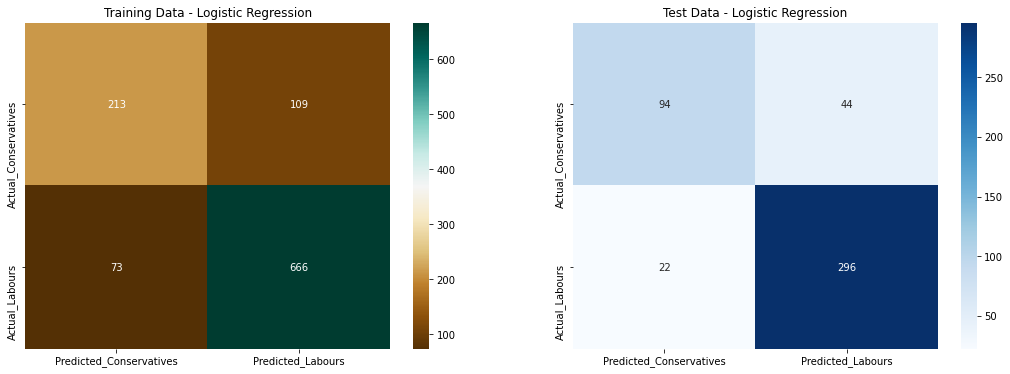

In [100]:
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False,figsize=(18,6))
plot1 = sns.heatmap(confusion_matrix(y_train,logR_grid_search.predict(X_train)),fmt='d',annot=True,ax = a[0][0],cmap='BrBG',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot1.set_title('Training Data - Logistic Regression')
#plot1.set_xlabel('Predicted')
#plot1.set_ylabel('Actual')
plot2 = sns.heatmap(confusion_matrix(y_test,logR_grid_search.predict(X_test)),fmt='d',annot=True,ax = a[0][1],cmap='Blues',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot2.set_title('Test Data - Logistic Regression')
#plot2.set_xlabel('Predicted')
#plot2.set_xlabel('Predicted')
#plot2.set_yticklabels()
plt.show()

<AxesSubplot:>

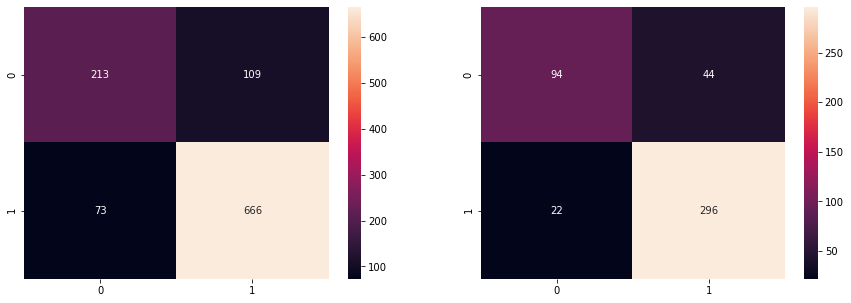

In [101]:
f,a = plt.subplots(1,2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_train,logR_grid_search.predict(X_train)),ax=a[0],annot=True,fmt='d')
sns.heatmap(confusion_matrix(y_test,logR_grid_search.predict(X_test)),ax=a[1],annot=True,fmt='d')

In [102]:
print('Logistic Regression - Training Data','\n',classification_report(y_train,logR_grid_search.predict(X_train)))
print('-----------------------------------------------------')
print('Logistic Regression - Test Data','\n',classification_report(y_test,logR_grid_search.predict(X_test)))

Logistic Regression - Training Data 
               precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061

-----------------------------------------------------
Logistic Regression - Test Data 
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



In [103]:
ytr_log_prob = logR_grid_search.predict_proba(X_train)
yts_log_prob = logR_grid_search.predict_proba(X_test)

AUC for the Training Data for the Logistic Regression model is: 0.877
AUC for the Test Data for the Logistic Regression model is: 0.913


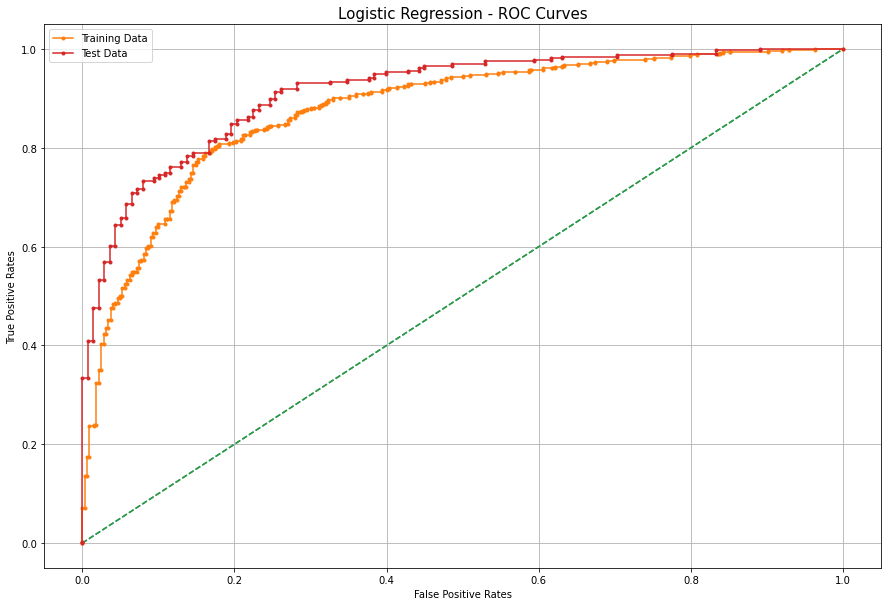

In [104]:
plt.figure(figsize=(15,10))
plt.title('Logistic Regression - ROC Curves',fontsize=15)
plt.xlabel('False Positive Rates',fontsize=10)
plt.ylabel('True Positive Rates',fontsize=10)

# AUC and ROC for the training data
log_auc_train = roc_auc_score(y_train,ytr_log_prob[:,1])
print('AUC for the Training Data for the Logistic Regression model is: %.3f' % log_auc_train)

fpr_log_tr,tpr_log_tr,threshold_log_tr = roc_curve(y_train,ytr_log_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_log_tr, tpr_log_tr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
log_auc_test = roc_auc_score(y_test,yts_log_prob[:,1])
print('AUC for the Test Data for the Logistic Regression model is: %.3f' % log_auc_test)

fpr_log_ts,tpr_log_ts,threshold_log_ts = roc_curve(y_test,yts_log_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_log_ts, tpr_log_ts, marker='.',label='Test Data')

plt.legend(loc='best')
plt.grid()
plt.show()

In [105]:
log_model=  LogisticRegression(max_iter=500, solver='lbfgs', tol=0.001)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=500, tol=0.001)

In [106]:
log_coeff = pd.DataFrame(log_model.coef_[0],index=X_train.columns,columns=['Coefficients']).sort_values(by='Coefficients',ascending=False)
log_coeff

,Coefficients
Blair,0.548915
national_economic_cond,0.347028
gender,0.049579
household_economic_cond,0.034505
age,-0.013296
Europe,-0.207974
political_knowledge,-0.403166
Hague,-0.855513


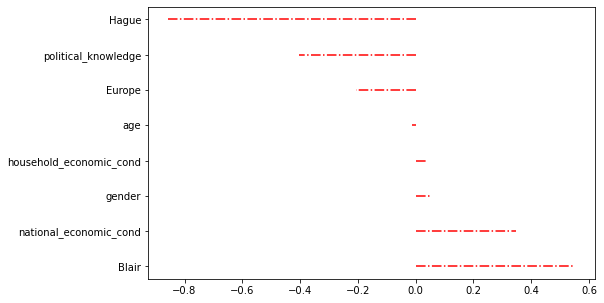

In [107]:
plt.figure(figsize=(8,5))
plt.hlines(log_coeff.index,xmin=0 ,xmax=log_coeff.values,linestyles='dashdot',colors=['red']*8)

In [108]:
### Logistic Reggression using Statsmodels

In [109]:
log_reg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [110]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1061
Model:                          Logit   Df Residuals:                     1053
Method:                           MLE   Df Model:                            7
Date:                Sun, 08 May 2022   Pseudo R-squ.:                     inf
Time:                        20:29:02   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                      3.577e-05      0.005      0.007      0.994      -0.010       0.010
national_economic_cond      0.5541      0.101      5.479      0.000       0.356       0.752


C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [111]:
print(log_reg.summary2())

                            Results: Logit
Model:                  Logit               Pseudo R-squared:    inf   
Dependent Variable:     vote                AIC:                 inf   
Date:                   2022-05-08 20:29    BIC:                 inf   
No. Observations:       1061                Log-Likelihood:      -inf  
Df Model:               7                   LL-Null:             0.0000
Df Residuals:           1053                LLR p-value:         1.0000
Converged:              1.0000              Scale:               1.0000
No. Iterations:         7.0000                                         
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
age                      0.0000   0.0049  0.0072 0.9942 -0.0096  0.0097
national_economic_cond   0.5541   0.1011  5.4790 0.0000  0.3559  0.7524
household_economic_co

In [112]:
ytr_pred = log_reg.predict(X_train)

In [113]:
ytr_pred = round(ytr_pred)

In [114]:
ytr_pred

533     1.0
708     1.0
1144    0.0
1081    1.0
957     1.0
       ... 
513     0.0
827     0.0
349     1.0
1248    0.0
1141    0.0
Length: 1061, dtype: float64

In [115]:
accuracy_score(y_train,ytr_pred)

0.8143261074458058

In [116]:
accuracy_score(y_test,round(log_reg.predict(X_test)))

0.8464912280701754

### Linear Discriminant Analysis Model

In [117]:
lda = LinearDiscriminantAnalysis()

In [118]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [119]:
lda.score(X_train,y_train)

0.822808671065033

In [120]:
lda.score(X_test,y_test)

0.8530701754385965

In [121]:
lda_param_grid = {'solver':['svd', 'lsqr', 'eigen'],'tol':[0.0001,0.00001]}

lda = LinearDiscriminantAnalysis()

lda_grid = GridSearchCV(estimator=lda,param_grid=lda_param_grid,cv=5)

lda_grid.fit(X_train,y_train)

print(lda_grid.best_params_)

{'solver': 'svd', 'tol': 0.0001}


In [122]:
lda_grid.score(X_train,y_train)

0.822808671065033

In [123]:
lda_grid.score(X_test,y_test)

0.8530701754385965

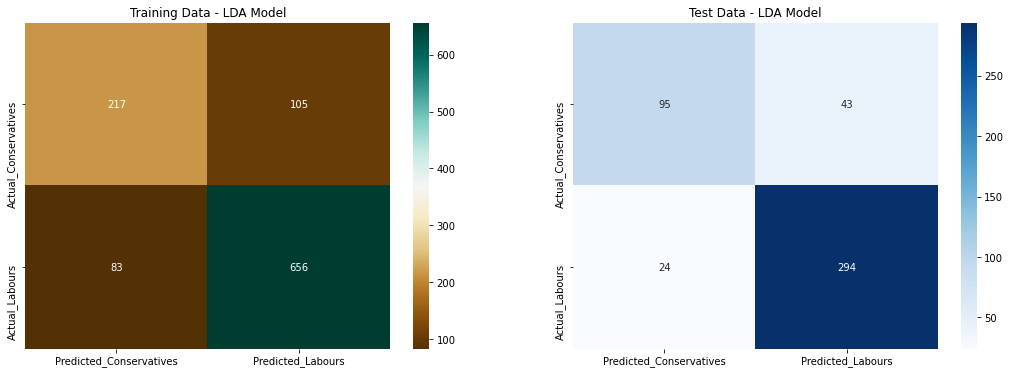

In [124]:
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False,figsize=(18,6))
plot1 = sns.heatmap(confusion_matrix(y_train,lda_grid.predict(X_train)),fmt='d',annot=True,ax = a[0][0],cmap='BrBG',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot1.set_title('Training Data - LDA Model')
plot2 = sns.heatmap(confusion_matrix(y_test,lda_grid.predict(X_test)),fmt='d',annot=True,ax = a[0][1],cmap='Blues',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot2.set_title('Test Data - LDA Model')
plt.show()

In [125]:
print('LDA - Training Data','\n',classification_report(y_train,lda_grid.predict(X_train)))
print('-----------------------------------------------------')
print('LDA - Test Data','\n',classification_report(y_test,lda_grid.predict(X_test)))

LDA - Training Data 
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061

-----------------------------------------------------
LDA - Test Data 
               precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



In [126]:
ytr_lda_prob = lda_grid.predict_proba(X_train)
yts_lda_prob = lda_grid.predict_proba(X_test)

AUC for the Training Data for the Linear Discriminant Analysis model is: 0.877
AUC for the Test Data for the Linear Discriminant Analysis model is: 0.914


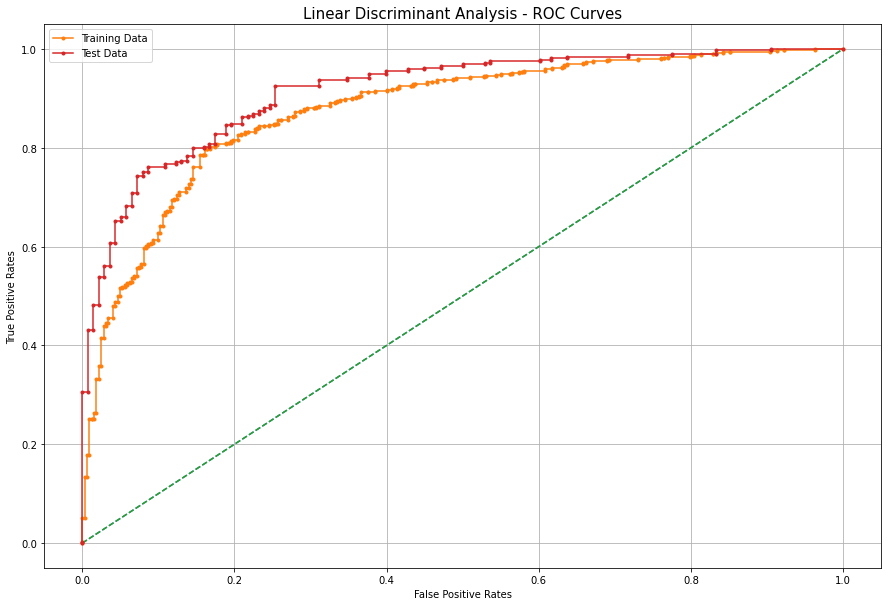

In [127]:
plt.figure(figsize=(15,10))
plt.title('Linear Discriminant Analysis - ROC Curves',fontsize=15)
plt.xlabel('False Positive Rates',fontsize=10)
plt.ylabel('True Positive Rates',fontsize=10)

# AUC and ROC for the training data
lda_auc_train = roc_auc_score(y_train,ytr_lda_prob[:,1])
print('AUC for the Training Data for the Linear Discriminant Analysis model is: %.3f' % lda_auc_train)

fpr_lda_tr,tpr_lda_tr,threshold_lda_tr = roc_curve(y_train,ytr_lda_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_lda_tr, tpr_lda_tr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
lda_auc_test = roc_auc_score(y_test,yts_lda_prob[:,1])
print('AUC for the Test Data for the Linear Discriminant Analysis model is: %.3f' % lda_auc_test)

fpr_lda_ts,tpr_lda_ts,threshold_lda_ts = roc_curve(y_test,yts_lda_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_lda_ts, tpr_lda_ts, marker='.',label='Test Data')

plt.legend(loc='best')
plt.grid()
plt.show()

In [128]:
lda_model=  LinearDiscriminantAnalysis(solver='svd', tol=0.0001)
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [129]:
lda_coeff = pd.DataFrame(lda_model.coef_[0],index=X_train.columns,columns=['Coefficients']).sort_values(by='Coefficients',ascending=False)
lda_coeff

,Coefficients
Blair,0.687664
national_economic_cond,0.364242
household_economic_cond,0.030376
gender,0.015968
age,-0.017470
Europe,-0.221792
political_knowledge,-0.483446
Hague,-0.974827


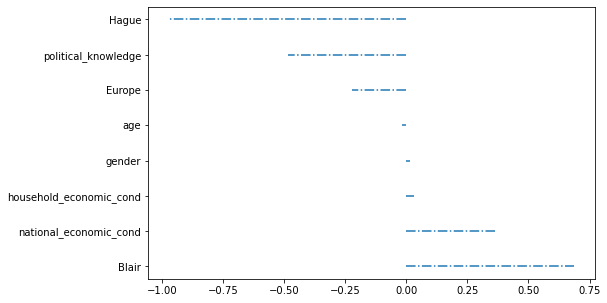

In [130]:
plt.figure(figsize=(8,5))
plt.hlines(lda_coeff.index,xmin=0 ,xmax=lda_coeff.values,linestyles='dashdot')

### KNN Model

In [131]:
knn = KNeighborsClassifier()

In [132]:
#unscaled data

In [133]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [134]:
knn.score(X_train,y_train)

0.8491988689915174

In [135]:
knn.score(X_test,y_test)

0.8070175438596491

In [136]:
#scaled data1

In [137]:
knn.fit(Xtr_sc,y_train)

KNeighborsClassifier()

In [138]:
knn.score(Xtr_sc,y_train)

0.8661639962299718

In [139]:
knn.score(Xtest_sc,y_test)

0.8399122807017544

In [140]:
#unscaled data2

In [141]:
knn.fit(xtr_sc,y_train)

KNeighborsClassifier()

In [142]:
knn.score(xtr_sc,y_train)

0.8614514608859567

In [143]:
knn.score(xtest_sc,y_test)

0.8508771929824561

#### Finding the optimal no. of K
Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis classification error

Hint:

Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the 
model with lowest MCE

In [144]:
mods = {}
for i in np.arange(1,19,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    mods[i] = knn.fit(xtr_sc,y_train)
print(mods)

{1: KNeighborsClassifier(n_neighbors=1), 3: KNeighborsClassifier(n_neighbors=3), 5: KNeighborsClassifier(), 7: KNeighborsClassifier(n_neighbors=7), 9: KNeighborsClassifier(n_neighbors=9), 11: KNeighborsClassifier(n_neighbors=11), 13: KNeighborsClassifier(n_neighbors=13), 15: KNeighborsClassifier(n_neighbors=15), 17: KNeighborsClassifier(n_neighbors=17)}


In [145]:
train_scores_list = []
test_scores_list = []
for k in mods:
    train_scores_list.append(mods[k].score(xtr_sc,y_train))
    test_scores_list.append(mods[k].score(xtest_sc,y_test))

In [146]:
train_scores_list

[1.0,
 0.882186616399623,
 0.8614514608859567,
 0.8454288407163054,
 0.8388312912346843,
 0.8360037700282752,
 0.8360037700282752,
 0.8331762488218661,
 0.8341187558906692]

In [147]:
test_scores_list

[0.8026315789473685,
 0.8377192982456141,
 0.8508771929824561,
 0.8508771929824561,
 0.8640350877192983,
 0.8574561403508771,
 0.8574561403508771,
 0.8552631578947368,
 0.8574561403508771]

In [148]:
train_errors_list = [1 - x for x in train_scores_list] 

In [149]:
MCE = [1 - x for x in test_scores_list]
MCE

[0.19736842105263153,
 0.16228070175438591,
 0.14912280701754388,
 0.14912280701754388,
 0.13596491228070173,
 0.14254385964912286,
 0.14254385964912286,
 0.14473684210526316,
 0.14254385964912286]

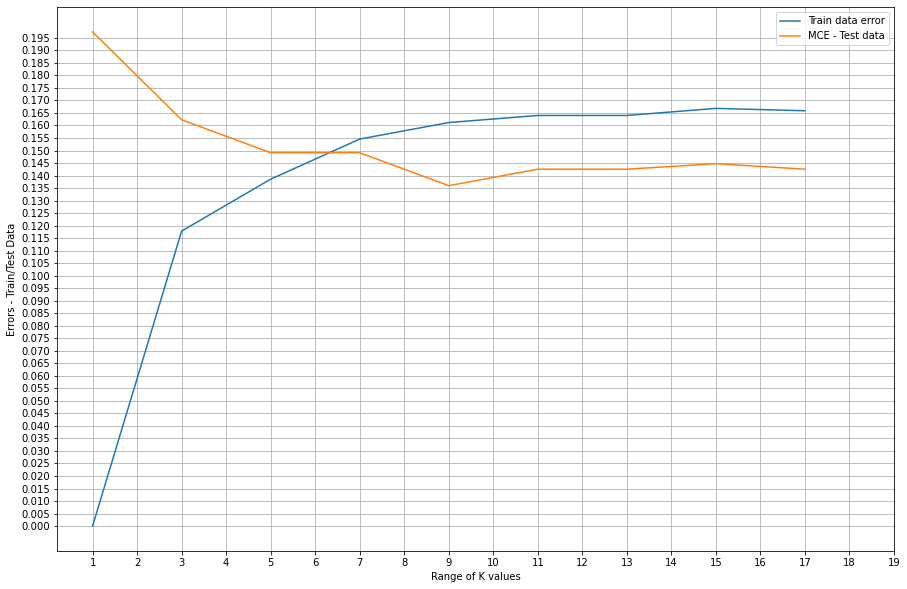

In [150]:
plt.figure(figsize=(15,10))
plt.plot(range(1,19,2),train_errors_list,label='Train data error')
plt.plot(range(1,19,2),MCE,label='MCE - Test data')
plt.xlabel('Range of K values')
plt.ylabel('Errors - Train/Test Data')
plt.xticks(np.arange(1,20))
plt.yticks(np.arange(0,0.2,0.005))
plt.legend()
plt.grid()
plt.show()

In [151]:
#Evaluating the models for k =9
print('For k = ',9)
knn_model = mods[9]
print('Model_Train_Score = ',knn_model.score(xtr_sc,y_train))
print('Model_Test_Score = ',knn_model.score(xtest_sc,y_test))
print('Train_Classification_Report','\n',classification_report(y_train,knn_model.predict(xtr_sc)))
print('Test_Classification_Report','\n',classification_report(y_test,knn_model.predict(xtest_sc)))
print('\n','--------------------------------     --------------------------------                       ')

For k =  9
Model_Train_Score =  0.8388312912346843
Model_Test_Score =  0.8640350877192983
Train_Classification_Report 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       322
           1       0.87      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061

Test_Classification_Report 
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       138
           1       0.89      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.85      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456


 --------------------------------     --------------------------------                       


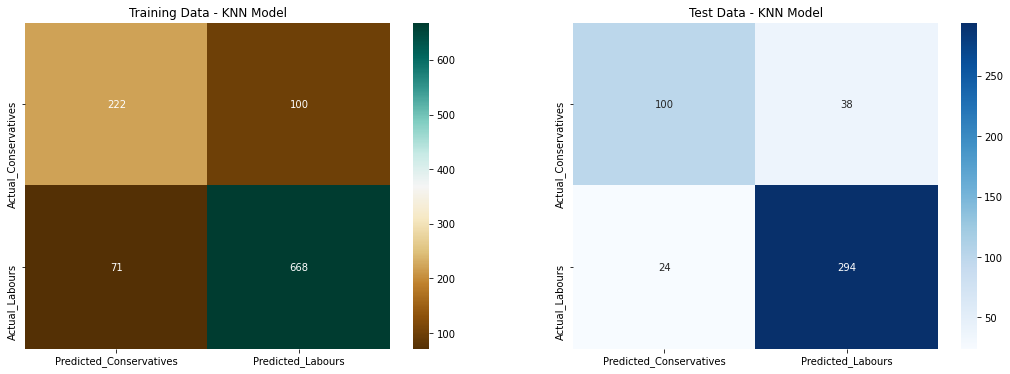

In [152]:
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False,figsize=(18,6))
plot1 = sns.heatmap(confusion_matrix(y_train,mods[9].predict(xtr_sc)),fmt='d',annot=True,ax = a[0][0],cmap='BrBG',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot1.set_title('Training Data - KNN Model')
#plot1.set_xlabel('Predicted')
#plot1.set_ylabel('Actual')
plot2 = sns.heatmap(confusion_matrix(y_test,mods[9].predict(xtest_sc)),fmt='d',annot=True,ax = a[0][1],cmap='Blues',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot2.set_title('Test Data - KNN Model')
#plot2.set_xlabel('Predicted')
#plot2.set_xlabel('Predicted')
#plot2.set_yticklabels()
plt.show()

In [153]:
knntr_prob = mods[9].predict_proba(xtr_sc)
knnts_prob = mods[9].predict_proba(xtest_sc)

AUC for the Training Data for the KNN model is: 0.914
AUC for the Test Data for the KNN model is: 0.896


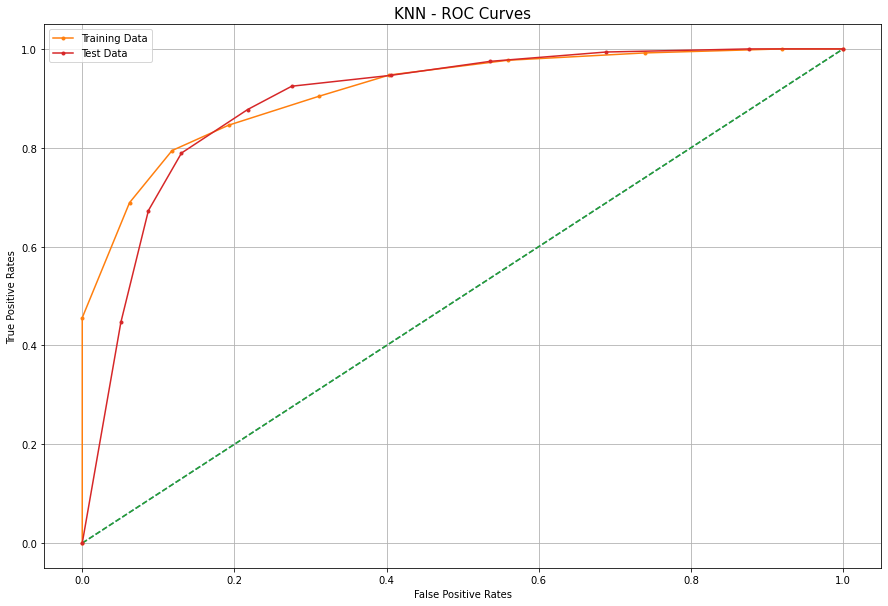

In [154]:
plt.figure(figsize=(15,10))
plt.title('KNN - ROC Curves',fontsize=15)
plt.xlabel('False Positive Rates',fontsize=10)
plt.ylabel('True Positive Rates',fontsize=10)

# AUC and ROC for the training data
knn_auc_train = roc_auc_score(y_train,knntr_prob[:,1])
print('AUC for the Training Data for the KNN model is: %.3f' % knn_auc_train)

fpr_knn_tr,tpr_knn_tr,threshold_knn_tr = roc_curve(y_train,knntr_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_knn_tr, tpr_knn_tr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
knn_auc_test = roc_auc_score(y_test,knnts_prob[:,1])
print('AUC for the Test Data for the KNN model is: %.3f' % knn_auc_test)

fpr_knn_ts,tpr_knn_ts,threshold_knn_ts = roc_curve(y_test,knnts_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_knn_ts, tpr_knn_ts, marker='.',label='Test Data')

plt.legend(loc='best')
plt.grid()
plt.show()

### Naive Bayes Model

In [155]:
gnb = GaussianNB()

In [156]:
gnb.fit(X_train,y_train)

GaussianNB()

In [157]:
gnb.score(X_train,y_train)

0.8199811498586239

In [158]:
gnb.score(X_test,y_test)

0.8574561403508771

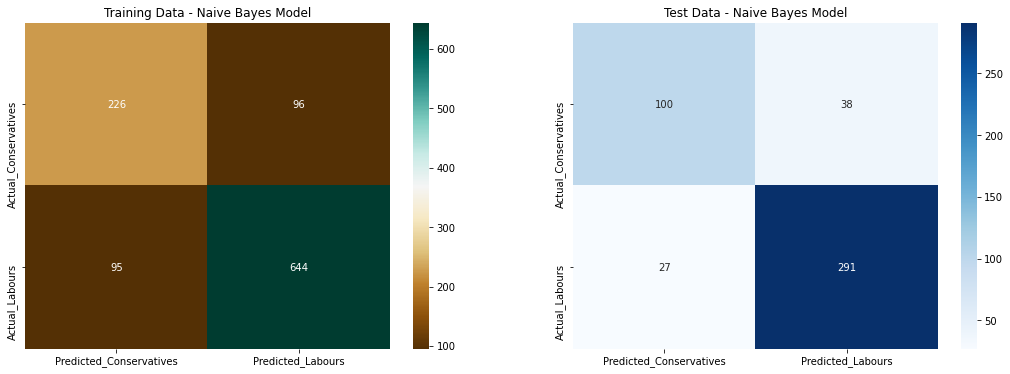

In [159]:
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False,figsize=(18,6))
plot1 = sns.heatmap(confusion_matrix(y_train,gnb.predict(X_train)),fmt='d',annot=True,ax = a[0][0],cmap='BrBG',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot1.set_title('Training Data - Naive Bayes Model')
plot2 = sns.heatmap(confusion_matrix(y_test,gnb.predict(X_test)),fmt='d',annot=True,ax = a[0][1],cmap='Blues',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot2.set_title('Test Data - Naive Bayes Model')
plt.show()

In [160]:
print('Naive Bayes - Training Data','\n',classification_report(y_train,gnb.predict(X_train)))
print('-----------------------------------------------------')
print('Naive Bayes - Test Data','\n',classification_report(y_test,gnb.predict(X_test)))

Naive Bayes - Training Data 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061

-----------------------------------------------------
Naive Bayes - Test Data 
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



In [161]:
gnbtr_prob = gnb.predict_proba(X_train)
gnbts_prob = gnb.predict_proba(X_test)

AUC for the Training Data for the Naive Bayes model is: 0.873
AUC for the Test Data for the Naive Bayes model is: 0.912


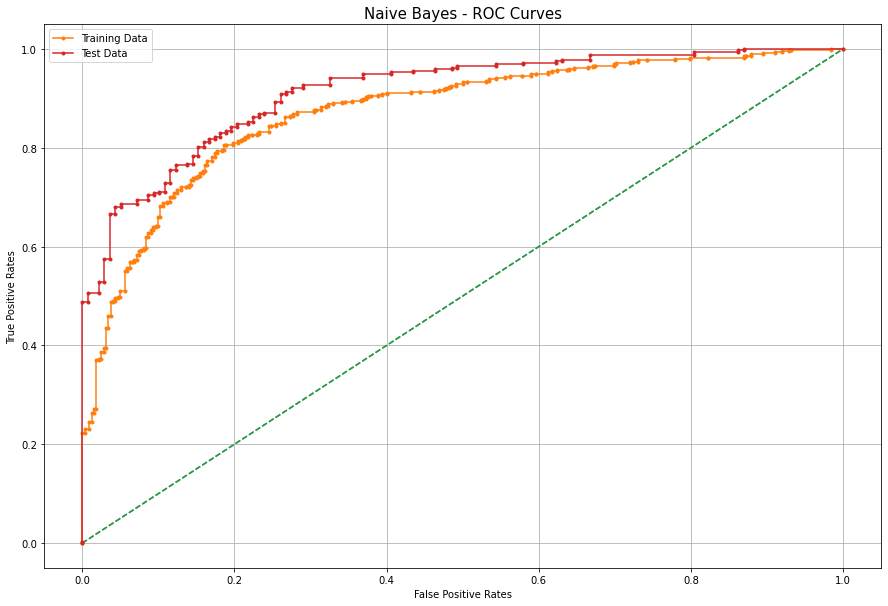

In [162]:
plt.figure(figsize=(15,10))
plt.title('Naive Bayes - ROC Curves',fontsize=15)
plt.xlabel('False Positive Rates',fontsize=10)
plt.ylabel('True Positive Rates',fontsize=10)

# AUC and ROC for the training data
gnb_auc_train = roc_auc_score(y_train,gnbtr_prob[:,1])
print('AUC for the Training Data for the Naive Bayes model is: %.3f' % gnb_auc_train)

fpr_gnb_tr,tpr_gnb_tr,threshold_gnb_tr = roc_curve(y_train,gnbtr_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_gnb_tr, tpr_gnb_tr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
gnb_auc_test = roc_auc_score(y_test,gnbts_prob[:,1])
print('AUC for the Test Data for the Naive Bayes model is: %.3f' % gnb_auc_test)

fpr_gnb_ts,tpr_gnb_ts,threshold_gnb_ts = roc_curve(y_test,gnbts_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_gnb_ts, tpr_gnb_ts, marker='.',label='Test Data')

plt.legend(loc='best')
plt.grid()
plt.show()

### Random Forest Model

In [163]:
rfcl = RandomForestClassifier()

In [164]:
rfcl.fit(X_train,y_train)

RandomForestClassifier()

In [165]:
rfcl.score(X_train,y_train)

1.0

In [166]:
rfcl.score(X_test,y_test)

0.8508771929824561

In [167]:
X_train.shape

(1061, 8)

In [168]:
rf_param_grid = {'n_estimators':[100,200,300],'criterion' : ["gini", "entropy"],'max_depth':[5,6,8],
             'min_samples_split':[40,45,60],'min_samples_leaf':[20,30,40], 'max_features':[4,6,8]}

rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf,param_grid=rf_param_grid,cv=5,error_score='raise',n_jobs=-1)

rf_grid.fit(X_train,y_train)

print(rf_grid.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 30, 'min_samples_split': 60, 'n_estimators': 300}


In [169]:
rf_grid.score(X_train,y_train)

0.824693685202639

In [170]:
rf_grid.score(X_test,y_test)

0.8377192982456141

In [171]:
rf_model = rf_grid.best_estimator_

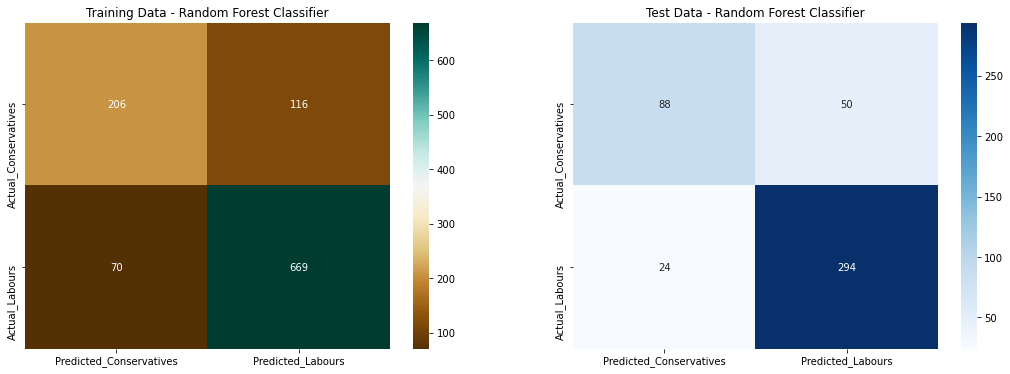

In [172]:
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False,figsize=(18,6))
plot1 = sns.heatmap(confusion_matrix(y_train,rf_model.predict(X_train)),fmt='d',annot=True,ax = a[0][0],cmap='BrBG',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot1.set_title('Training Data - Random Forest Classifier')
plot2 = sns.heatmap(confusion_matrix(y_test,rf_model.predict(X_test)),fmt='d',annot=True,ax = a[0][1],cmap='Blues',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot2.set_title('Test Data - Random Forest Classifier')
plt.show()

In [173]:
print('Random Forest Classifier - Training Data','\n',classification_report(y_train,rf_model.predict(X_train)))
print('-----------------------------------------------------')
print('Random Forest Classifier - Test Data','\n',classification_report(y_test,rf_model.predict(X_test)))

Random Forest Classifier - Training Data 
               precision    recall  f1-score   support

           0       0.75      0.64      0.69       322
           1       0.85      0.91      0.88       739

    accuracy                           0.82      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.82      0.82      0.82      1061

-----------------------------------------------------
Random Forest Classifier - Test Data 
               precision    recall  f1-score   support

           0       0.79      0.64      0.70       138
           1       0.85      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.83      0.84      0.83       456



In [174]:
rftr_prob = rf_model.predict_proba(X_train)
rfts_prob = rf_model.predict_proba(X_test)

AUC for the Training Data for the Random Forest Classifier model is: 0.893
AUC for the Test Data for the Random Forest Classifier model is: 0.913


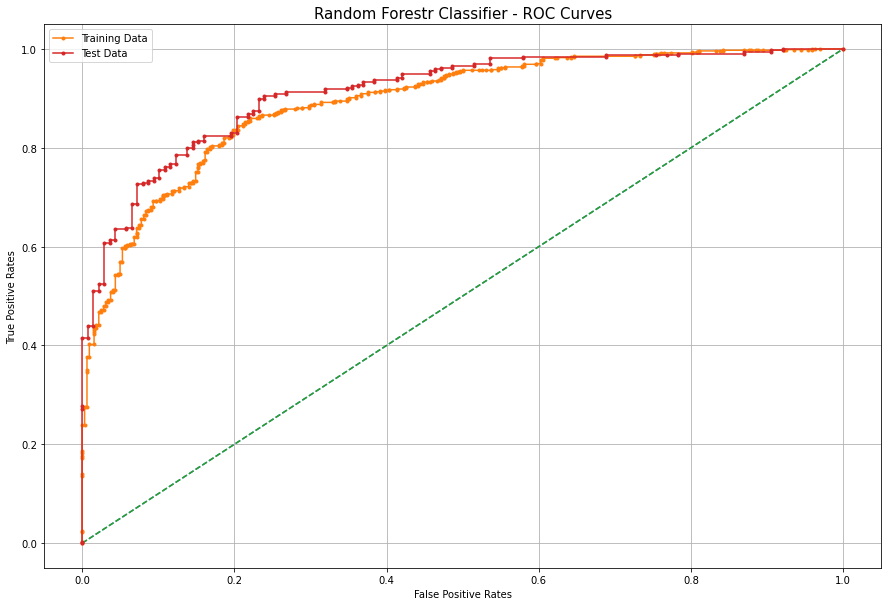

In [175]:
plt.figure(figsize=(15,10))
plt.title('Random Forestr Classifier - ROC Curves',fontsize=15)
plt.xlabel('False Positive Rates',fontsize=10)
plt.ylabel('True Positive Rates',fontsize=10)

# AUC and ROC for the training data
rf_auc_train = roc_auc_score(y_train,rftr_prob[:,1])
print('AUC for the Training Data for the Random Forest Classifier model is: %.3f' % rf_auc_train)

fpr_rf_tr,tpr_rf_tr,threshold_rf_tr = roc_curve(y_train,rftr_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_rf_tr, tpr_rf_tr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
rf_auc_test = roc_auc_score(y_test,rfts_prob[:,1])
print('AUC for the Test Data for the Random Forest Classifier model is: %.3f' % rf_auc_test)

fpr_rf_ts,tpr_rf_ts,threshold_rf_ts = roc_curve(y_test,rfts_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_rf_ts, tpr_rf_ts, marker='.',label='Test Data')

plt.legend(loc='best')
plt.grid()
plt.show()

In [176]:
rf_imp = pd.DataFrame(rf_model.feature_importances_,index=X_train.columns,columns=['Coefficients']).sort_values(by='Coefficients',ascending=False)
rf_imp

,Coefficients
Hague,0.452604
Europe,0.197996
Blair,0.183583
political_knowledge,0.102187
age,0.033942
national_economic_cond,0.020746
household_economic_cond,0.006541
gender,0.002400


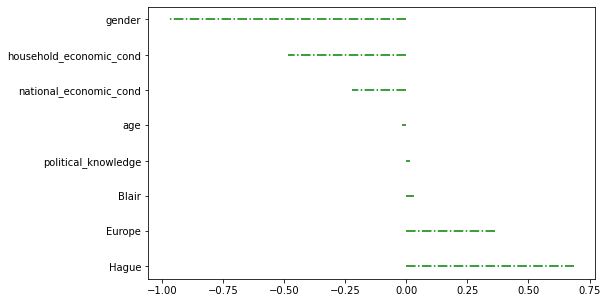

In [177]:
plt.figure(figsize=(8,5))
plt.hlines(rf_imp.index,xmin=0 ,xmax=lda_coeff.values,linestyles='dashdot',colors=['green']*8)

### Bagging Classifier with Random Forest

In [178]:
bgcl = BaggingClassifier(base_estimator=RandomForestClassifier())

In [179]:
bgcl.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier())

In [180]:
bgcl.score(X_train,y_train)

0.9641847313854854

In [181]:
bgcl.score(X_test,y_test)

0.8574561403508771

In [182]:
bgcl_param_grid = {'n_estimators':[20,40,60],'max_samples':[400,600,800],
                  'max_features':[6,8],'bootstrap_features':[True,False]}

bg = BaggingClassifier(base_estimator=RandomForestClassifier(),bootstrap=True)

bgcl_grid = GridSearchCV(estimator=bg,param_grid=bgcl_param_grid,cv=5,n_jobs=-1)

bgcl_grid.fit(X_train,y_train)

print(bgcl_grid.best_params_)

{'bootstrap_features': False, 'max_features': 8, 'max_samples': 600, 'n_estimators': 20}


In [183]:
bgcl_grid.score(X_train,y_train)

0.9274269557021678

In [184]:
bgcl_grid.score(X_test,y_test)

0.8574561403508771

In [185]:
bg_model = bgcl_grid.best_estimator_

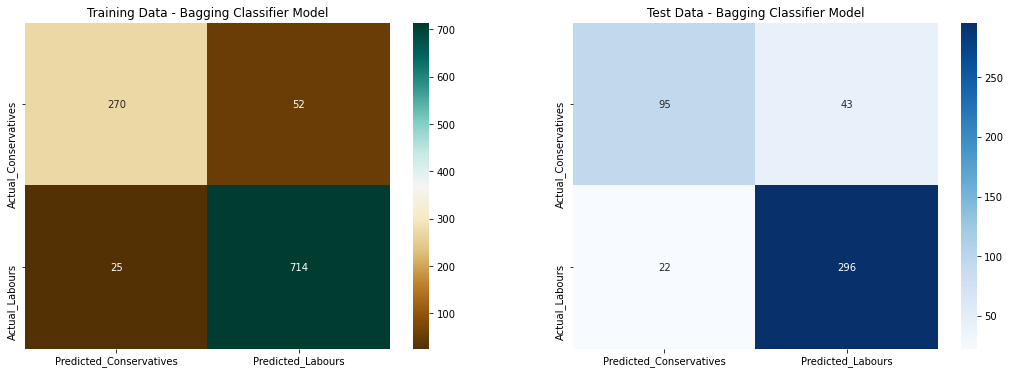

In [186]:
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False,figsize=(18,6))
plot1 = sns.heatmap(confusion_matrix(y_train,bgcl_grid.predict(X_train)),fmt='d',annot=True,ax = a[0][0],cmap='BrBG',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot1.set_title('Training Data - Bagging Classifier Model')
#plot1.set_xlabel('Predicted')
#plot1.set_ylabel('Actual')
plot2 = sns.heatmap(confusion_matrix(y_test,bgcl_grid.predict(X_test)),fmt='d',annot=True,ax = a[0][1],cmap='Blues',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot2.set_title('Test Data - Bagging Classifier Model')
#plot2.set_xlabel('Predicted')
#plot2.set_xlabel('Predicted')
#plot2.set_yticklabels()
plt.show()

In [187]:
print('Bagging Classifier - Training Data','\n',classification_report(y_train,bg_model.predict(X_train)))
print('-----------------------------------------------------')
print('Bagging Classifier - Test Data','\n',classification_report(y_test,bg_model.predict(X_test)))

Bagging Classifier - Training Data 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       322
           1       0.93      0.97      0.95       739

    accuracy                           0.93      1061
   macro avg       0.92      0.90      0.91      1061
weighted avg       0.93      0.93      0.93      1061

-----------------------------------------------------
Bagging Classifier - Test Data 
               precision    recall  f1-score   support

           0       0.81      0.69      0.75       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



In [188]:
bgtr_prob = bg_model.predict_proba(X_train)
bgts_prob = bg_model.predict_proba(X_test)

AUC for the Training Data for the Bagging Classifier model is: 0.981
AUC for the Test Data for the Bagging Classifier model is: 0.913


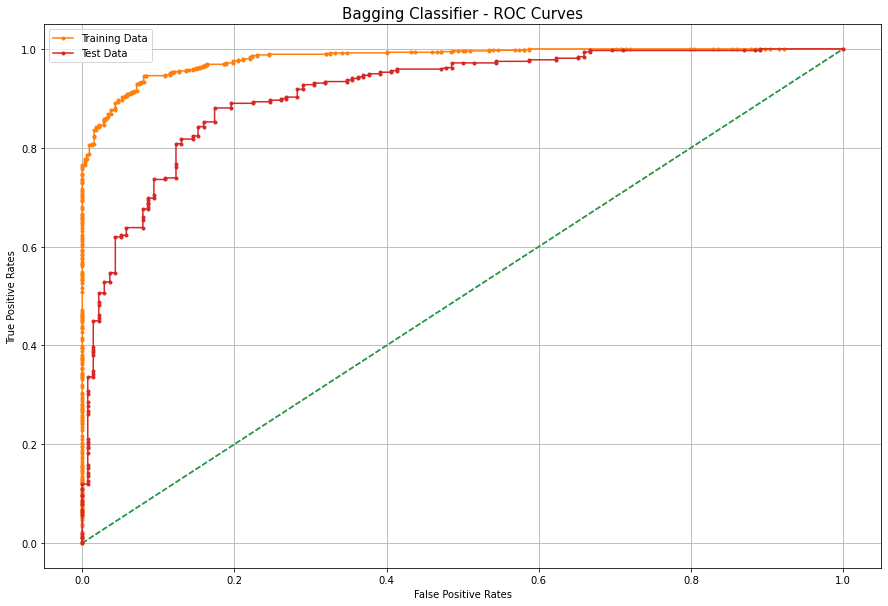

In [189]:
plt.figure(figsize=(15,10))
plt.title('Bagging Classifier - ROC Curves',fontsize=15)
plt.xlabel('False Positive Rates',fontsize=10)
plt.ylabel('True Positive Rates',fontsize=10)

# AUC and ROC for the training data
bg_auc_train = roc_auc_score(y_train,bgtr_prob[:,1])
print('AUC for the Training Data for the Bagging Classifier model is: %.3f' % bg_auc_train)

fpr_bg_tr,tpr_bg_tr,threshold_bg_tr = roc_curve(y_train,bgtr_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_bg_tr, tpr_bg_tr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
bg_auc_test = roc_auc_score(y_test,bgts_prob[:,1])
print('AUC for the Test Data for the Bagging Classifier model is: %.3f' % bg_auc_test)

fpr_bg_ts,tpr_bg_ts,threshold_bg_ts = roc_curve(y_test,bgts_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_bg_ts, tpr_bg_ts, marker='.',label='Test Data')

plt.legend(loc='best')
plt.grid()
plt.show()

### Boosting

### AdaBoost Model

In [190]:
abcl = AdaBoostClassifier()

In [191]:
abcl.fit(X_train,y_train)

AdaBoostClassifier()

In [192]:
abcl.score(X_train,y_train)

0.8397737983034873

In [193]:
abcl.score(X_test,y_test)

0.8355263157894737

In [194]:
abcl_param_grid = {'n_estimators':[20,40,60],'learning_rate':[0.1,0.25,0.5,1]}

ab = AdaBoostClassifier()

abcl_grid = GridSearchCV(estimator=ab,param_grid=abcl_param_grid,cv=5,n_jobs=-1)

abcl_grid.fit(X_train,y_train)

print(abcl_grid.best_params_)

{'learning_rate': 0.25, 'n_estimators': 40}


In [195]:
abcl_grid.score(X_train,y_train)

0.822808671065033

In [196]:
abcl_grid.score(X_test,y_test)

0.8464912280701754

In [197]:
ab_model = abcl_grid.best_estimator_

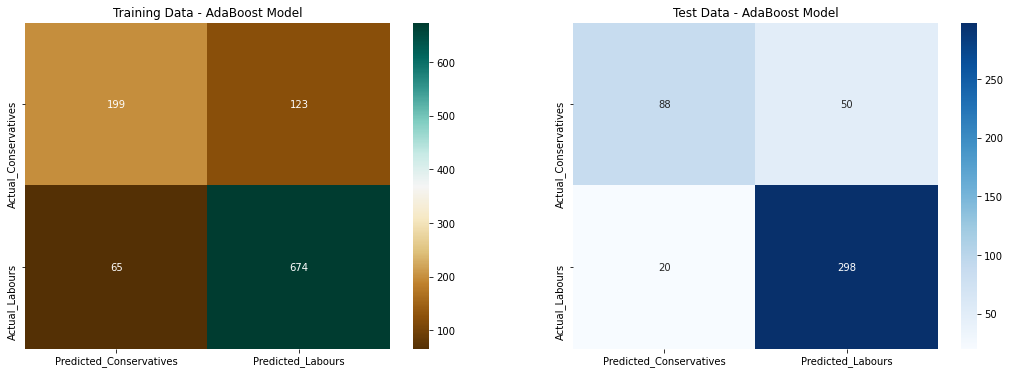

In [198]:
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False,figsize=(18,6))
plot1 = sns.heatmap(confusion_matrix(y_train,ab_model.predict(X_train)),fmt='d',annot=True,ax = a[0][0],cmap='BrBG',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot1.set_title('Training Data - AdaBoost Model')
#plot1.set_xlabel('Predicted')
#plot1.set_ylabel('Actual')
plot2 = sns.heatmap(confusion_matrix(y_test,ab_model.predict(X_test)),fmt='d',annot=True,ax = a[0][1],cmap='Blues',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot2.set_title('Test Data - AdaBoost Model')
#plot2.set_xlabel('Predicted')
#plot2.set_xlabel('Predicted')
#plot2.set_yticklabels()
plt.show()

In [199]:
print('AdaBoost Classifier - Training Data','\n',classification_report(y_train,ab_model.predict(X_train)))
print('-----------------------------------------------------')
print('AdaBoost Classifier - Test Data','\n',classification_report(y_test,ab_model.predict(X_test)))

AdaBoost Classifier - Training Data 
               precision    recall  f1-score   support

           0       0.75      0.62      0.68       322
           1       0.85      0.91      0.88       739

    accuracy                           0.82      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.82      0.82      0.82      1061

-----------------------------------------------------
AdaBoost Classifier - Test Data 
               precision    recall  f1-score   support

           0       0.81      0.64      0.72       138
           1       0.86      0.94      0.89       318

    accuracy                           0.85       456
   macro avg       0.84      0.79      0.81       456
weighted avg       0.84      0.85      0.84       456



In [200]:
abtr_prob = ab_model.predict_proba(X_train)
abts_prob = ab_model.predict_proba(X_test)

AUC for the Training Data for the Adaboost model is: 0.892
AUC for the Test Data for the Adaboost model is: 0.913


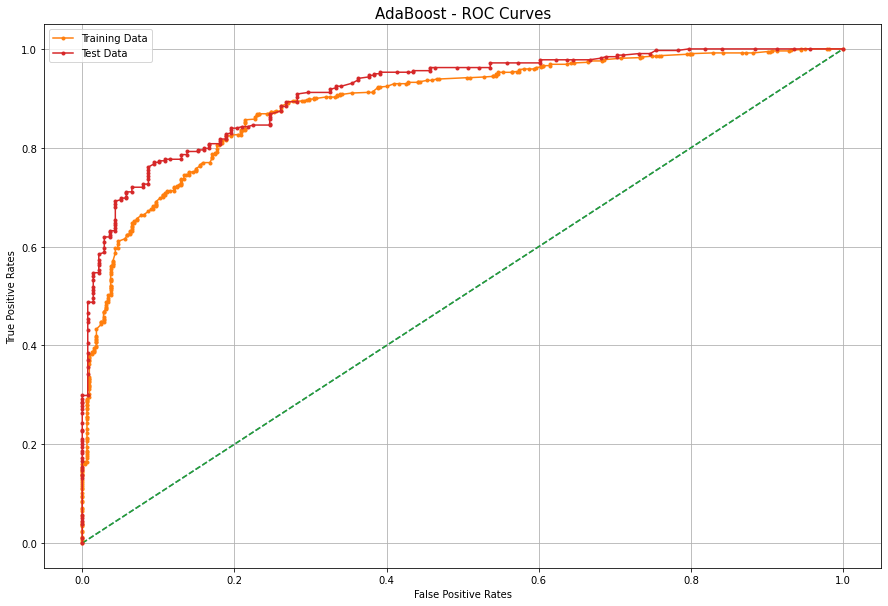

In [201]:
plt.figure(figsize=(15,10))
plt.title('AdaBoost - ROC Curves',fontsize=15)
plt.xlabel('False Positive Rates',fontsize=10)
plt.ylabel('True Positive Rates',fontsize=10)

# AUC and ROC for the training data
ab_auc_train = roc_auc_score(y_train,abtr_prob[:,1])
print('AUC for the Training Data for the Adaboost model is: %.3f' % ab_auc_train)

fpr_ab_tr,tpr_ab_tr,threshold_ab_tr = roc_curve(y_train,abtr_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_ab_tr, tpr_ab_tr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
ab_auc_test = roc_auc_score(y_test,abts_prob[:,1])
print('AUC for the Test Data for the Adaboost model is: %.3f' % ab_auc_test)

fpr_ab_ts,tpr_ab_ts,threshold_ab_ts = roc_curve(y_test,abts_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_ab_ts, tpr_ab_ts, marker='.',label='Test Data')

plt.legend(loc='best')
plt.grid()
plt.show()

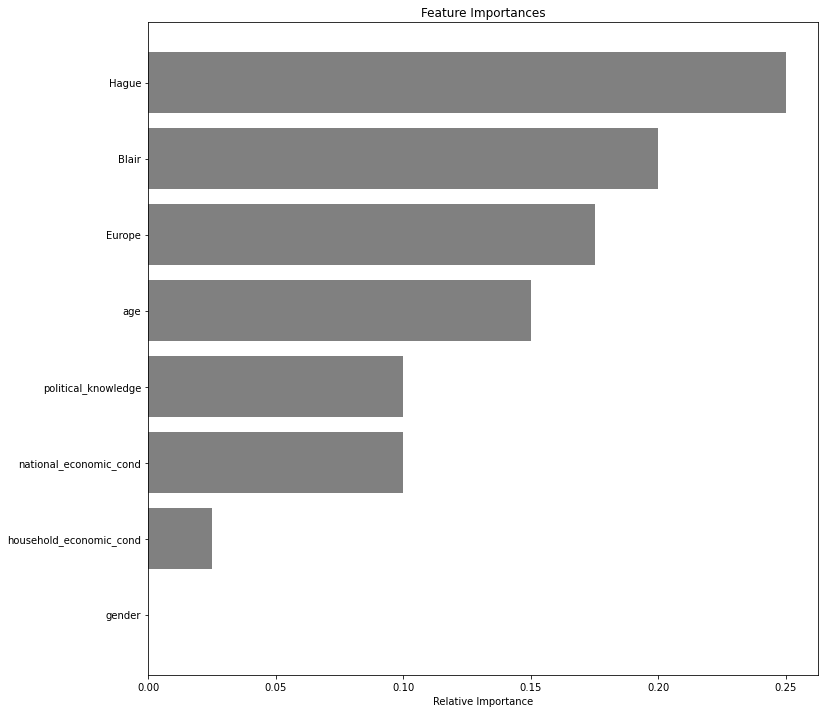

In [202]:
ab_importances = ab_model.feature_importances_
indices = np.argsort(ab_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), ab_importances[indices], color='grey', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### GradientBoost Model

In [203]:
gbcl = GradientBoostingClassifier()

In [204]:
gbcl.fit(X_train,y_train)

GradientBoostingClassifier()

In [205]:
gbcl.score(X_train,y_train)

0.885956644674835

In [206]:
gbcl.score(X_test,y_test)

0.8421052631578947

In [207]:
gbcl_param_grid = {'n_estimators':[40,60,100,150],'learning_rate':[0.01,0.1,0.25,0.5,1],
                  'min_samples_split':[10,20,30],'criterion':['friedman_mse', 'squared_error', 'mae'],
                  'max_depth':[3,6,9]}

gb = GradientBoostingClassifier()

gbcl_grid = GridSearchCV(estimator=gb,param_grid=gbcl_param_grid,cv=5,n_jobs=-1)

gbcl_grid.fit(X_train,y_train)

print(gbcl_grid.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 30, 'n_estimators': 100}


In [208]:
gbcl_grid.score(X_train,y_train)

0.883129123468426

In [209]:
gbcl_grid.score(X_test,y_test)

0.8486842105263158

In [210]:
gb_model = gbcl_grid.best_estimator_

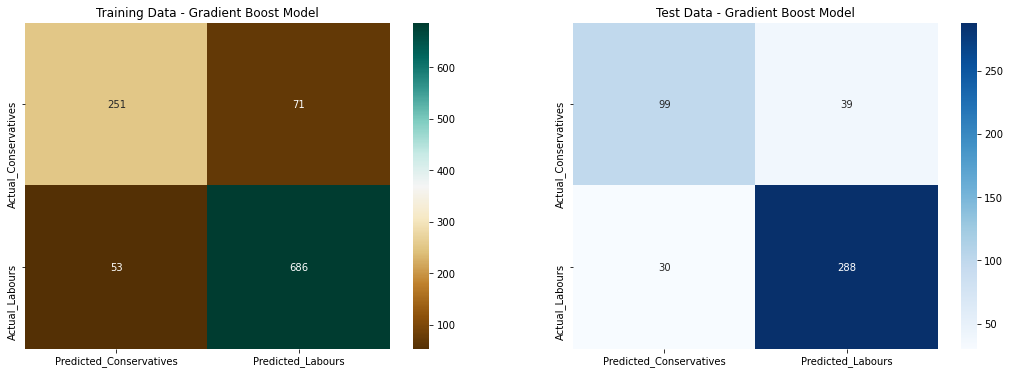

In [211]:
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False,figsize=(18,6))
plot1 = sns.heatmap(confusion_matrix(y_train,gbcl_grid.predict(X_train)),fmt='d',annot=True,ax = a[0][0],cmap='BrBG',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot1.set_title('Training Data - Gradient Boost Model')
plot2 = sns.heatmap(confusion_matrix(y_test,gbcl_grid.predict(X_test)),fmt='d',annot=True,ax = a[0][1],cmap='Blues',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot2.set_title('Test Data - Gradient Boost Model')
plt.show()

In [212]:
print('Gradient Boost Classifier - Training Data','\n',classification_report(y_train,gb_model.predict(X_train)))
print('-----------------------------------------------------')
print('Gradient Boost Classifier - Test Data','\n',classification_report(y_test,gb_model.predict(X_test)))

Gradient Boost Classifier - Training Data 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       322
           1       0.91      0.93      0.92       739

    accuracy                           0.88      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.88      0.88      0.88      1061

-----------------------------------------------------
Gradient Boost Classifier - Test Data 
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



In [213]:
gbtr_prob = gbcl_grid.predict_proba(X_train)
gbts_prob = gbcl_grid.predict_proba(X_test)

AUC for the Training Data for the Gradient Boost model is: 0.943
AUC for the Test Data for the Gradient Boost model is: 0.912


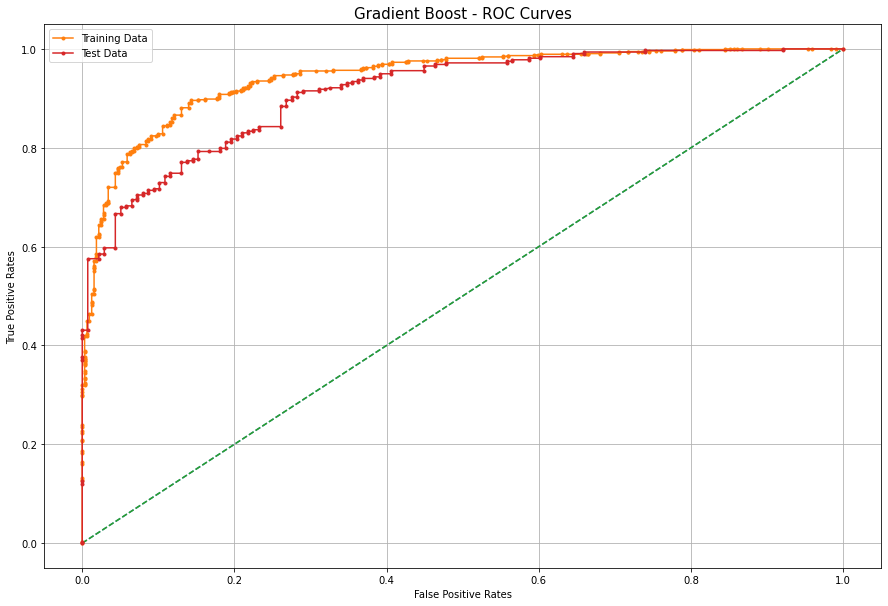

In [214]:
plt.figure(figsize=(15,10))
plt.title('Gradient Boost - ROC Curves',fontsize=15)
plt.xlabel('False Positive Rates',fontsize=10)
plt.ylabel('True Positive Rates',fontsize=10)

# AUC and ROC for the training data
gb_auc_train = roc_auc_score(y_train,gbtr_prob[:,1])
print('AUC for the Training Data for the Gradient Boost model is: %.3f' % gb_auc_train)

fpr_gb_tr,tpr_gb_tr,threshold_gb_tr = roc_curve(y_train,gbtr_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_gb_tr, tpr_gb_tr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
gb_auc_test = roc_auc_score(y_test,gbts_prob[:,1])
print('AUC for the Test Data for the Gradient Boost model is: %.3f' % gb_auc_test)

fpr_gb_ts,tpr_gb_ts,threshold_gb_ts = roc_curve(y_test,gbts_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_gb_ts, tpr_gb_ts, marker='.',label='Test Data')

plt.legend(loc='best')
plt.grid()
plt.show()

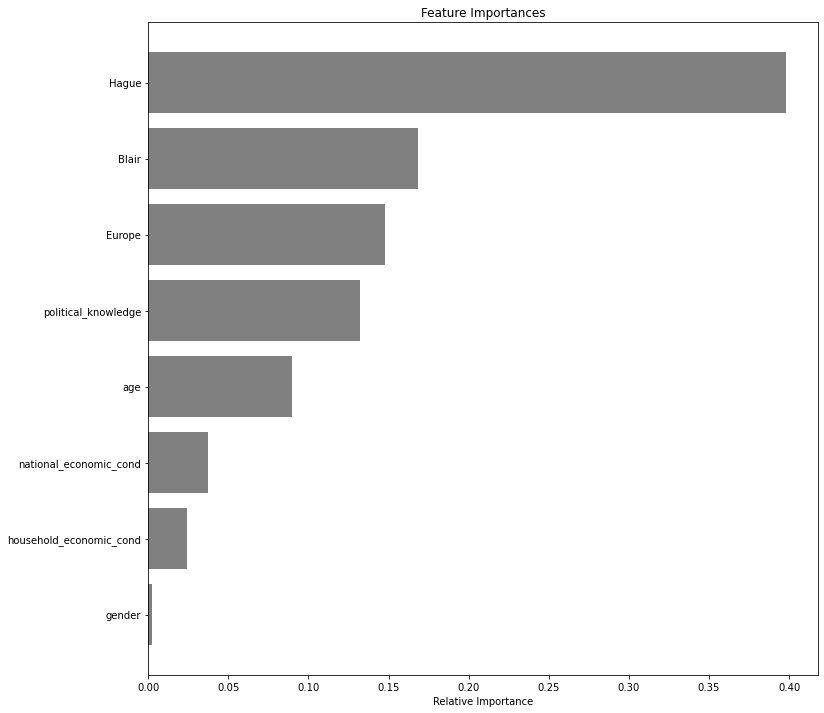

In [215]:
gb_importances = gb_model.feature_importances_
indices = np.argsort(gb_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), gb_importances[indices], color='grey', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### xgBoost Classifier Model

In [216]:
xgb = XGBClassifier()

In [217]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [218]:
xgb.score(X_train,y_train)

0.9905749293119699

In [219]:
xgb.score(X_test,y_test)

0.8179824561403509

In [220]:
xgbcl_param_grid = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

xgb = XGBClassifier()

xgbcl_grid = GridSearchCV(estimator=xgb,param_grid=xgbcl_param_grid,cv=5,n_jobs=-1)

xgbcl_grid.fit(X_train,y_train)

print(xgbcl_grid.best_params_)

{'colsample_bylevel': 0.9, 'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 1}


In [221]:
xgbcl_grid.score(X_train,y_train)

0.9019792648444863

In [222]:
xgbcl_grid.score(X_test,y_test)

0.8486842105263158

In [223]:
xgb_model = xgbcl_grid.best_estimator_

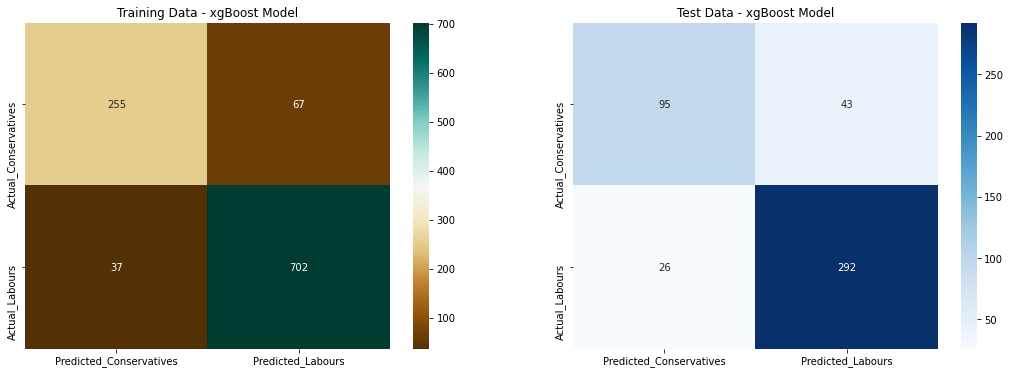

In [224]:
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False,figsize=(18,6))
plot1 = sns.heatmap(confusion_matrix(y_train,xgbcl_grid.predict(X_train)),fmt='d',annot=True,ax = a[0][0],cmap='BrBG',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot1.set_title('Training Data - xgBoost Model')
plot2 = sns.heatmap(confusion_matrix(y_test,xgbcl_grid.predict(X_test)),fmt='d',annot=True,ax = a[0][1],cmap='Blues',xticklabels=['Predicted_Conservatives','Predicted_Labours'],yticklabels=['Actual_Conservatives','Actual_Labours']);
plot2.set_title('Test Data - xgBoost Model')
plt.show()

In [225]:
print('xgBoost Classifier - Training Data','\n',classification_report(y_train,xgb_model.predict(X_train)))
print('-----------------------------------------------------')
print('xgBoost Classifier - Test Data','\n',classification_report(y_test,xgb_model.predict(X_test)))

xgBoost Classifier - Training Data 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       322
           1       0.91      0.95      0.93       739

    accuracy                           0.90      1061
   macro avg       0.89      0.87      0.88      1061
weighted avg       0.90      0.90      0.90      1061

-----------------------------------------------------
xgBoost Classifier - Test Data 
               precision    recall  f1-score   support

           0       0.79      0.69      0.73       138
           1       0.87      0.92      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.85      0.85      0.85       456



In [226]:
xgbtr_prob = xgb_model.predict_proba(X_train)
xgbts_prob = xgb_model.predict_proba(X_test)

AUC for the Training Data for the xgBoost model is: 0.954
AUC for the Test Data for the xgBoost model is: 0.912


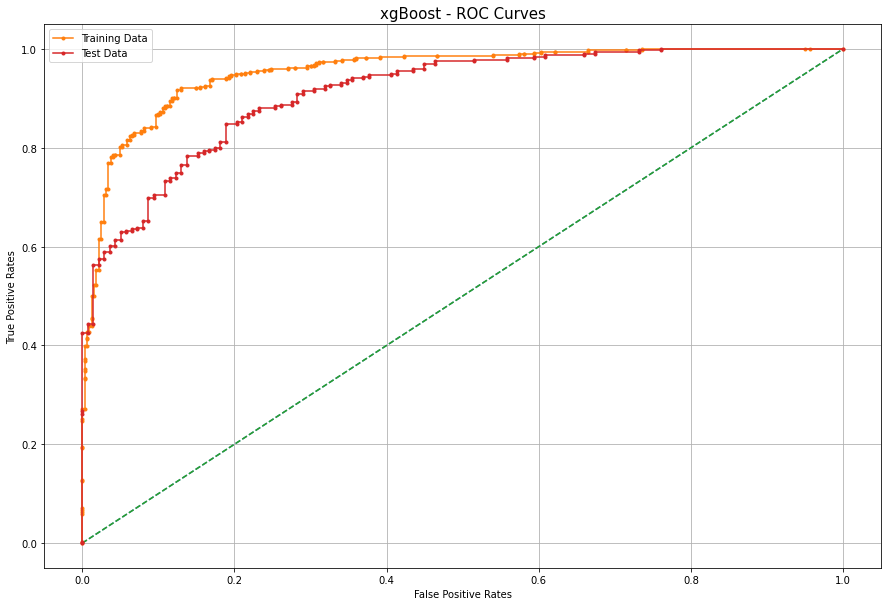

In [227]:
plt.figure(figsize=(15,10))
plt.title('xgBoost - ROC Curves',fontsize=15)
plt.xlabel('False Positive Rates',fontsize=10)
plt.ylabel('True Positive Rates',fontsize=10)

# AUC and ROC for the training data
xgb_auc_train = roc_auc_score(y_train,xgbtr_prob[:,1])
print('AUC for the Training Data for the xgBoost model is: %.3f' % xgb_auc_train)

fpr_xgb_tr,tpr_xgb_tr,threshold_xgb_tr = roc_curve(y_train,xgbtr_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_xgb_tr, tpr_xgb_tr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
xgb_auc_test = roc_auc_score(y_test,xgbts_prob[:,1])
print('AUC for the Test Data for the xgBoost model is: %.3f' % xgb_auc_test)

fpr_xgb_ts,tpr_xgb_ts,threshold_xgb_ts = roc_curve(y_test,xgbts_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_xgb_ts, tpr_xgb_ts, marker='.',label='Test Data')

plt.legend(loc='best')
plt.grid()
plt.show()

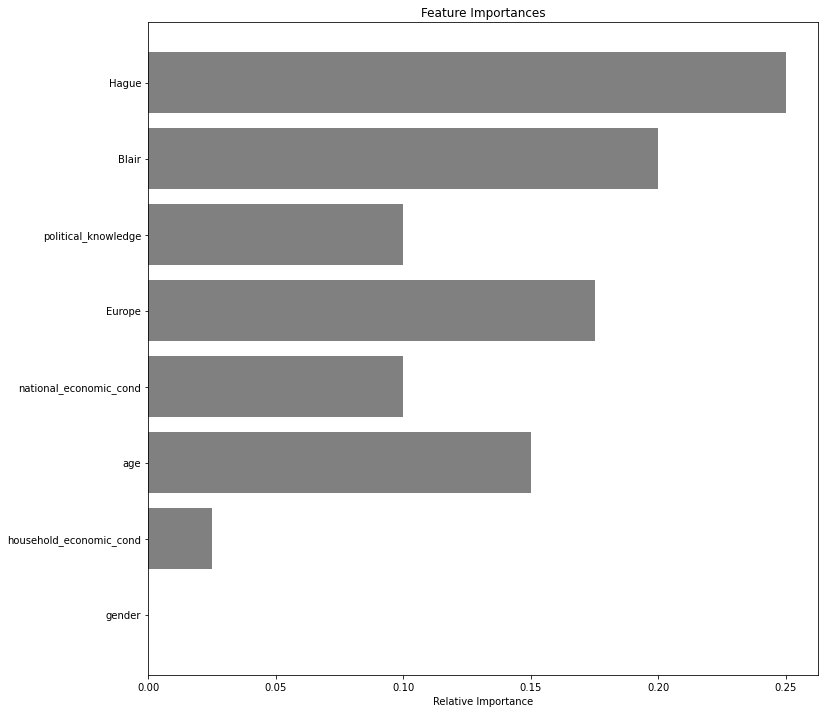

In [228]:
xgb_importances = xgb_model.feature_importances_
indices = np.argsort(xgb_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), ab_importances[indices], color='grey', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [229]:
models = [log_model,lda_model,knn_model,gnb,rf_model,bg_model,ab_model,gb_model,xgb_model]

In [230]:
models

[LogisticRegression(max_iter=500, tol=0.001),
 LinearDiscriminantAnalysis(),
 KNeighborsClassifier(n_neighbors=9),
 GaussianNB(),
 RandomForestClassifier(max_depth=6, max_features=6, min_samples_leaf=30,
                        min_samples_split=60, n_estimators=300),
 BaggingClassifier(base_estimator=RandomForestClassifier(), max_features=8,
                   max_samples=600, n_estimators=20),
 AdaBoostClassifier(learning_rate=0.25, n_estimators=40),
 GradientBoostingClassifier(min_samples_split=30),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.7,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_ch

In [231]:
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train = []
f1_score_test = []

# looping through all the models to get the accuracy, recall and precision scores
for model in models:
    if model != knn_model: 
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
    else:
        pred_train = model.predict(xtr_sc)
        pred_test = model.predict(xtest_sc)
    acc_train.append(metrics.accuracy_score(y_train,pred_train))
    acc_test.append(metrics.accuracy_score(y_test,pred_test))
    recall_train.append(metrics.recall_score(y_train,pred_train))
    recall_test.append(metrics.recall_score(y_test,pred_test))
    precision_train.append(metrics.precision_score(y_train,pred_train))
    precision_test.append(metrics.precision_score(y_test,pred_test))
    f1_score_train.append(metrics.f1_score(y_train,pred_train))
    f1_score_test.append(metrics.f1_score(y_test,pred_test))

In [232]:
comp_df = pd.DataFrame({'Models':['Logistic Regression','LDA Model', 'KNN Model','Naive Bayes Model',
                                          'Random Forest Model','Bagging Model with RF',
                                          'AdaBoost Model','Gradient Boosting Model','XGBoost Model'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1_Score':f1_score_train,'Test_F1_Score':f1_score_test}) 
comp_df

,Models,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_Score,Test_F1_Score
0,Logistic Regression,0.828464,0.855263,0.901218,0.930818,0.859355,0.870588,0.879789,0.899696
1,LDA Model,0.822809,0.853070,0.887686,0.924528,0.862024,0.872404,0.874667,0.897710
2,KNN Model,0.838831,0.864035,0.903924,0.924528,0.869792,0.885542,0.886530,0.904615
3,Naive Bayes Model,0.819981,0.857456,0.871448,0.915094,0.870270,0.884498,0.870859,0.899536
4,Random Forest Model,0.824694,0.837719,0.905277,0.924528,0.852229,0.854651,0.877953,0.888218
5,Bagging Model with RF,0.927427,0.857456,0.966171,0.930818,0.932115,0.873156,0.948837,0.901065
6,AdaBoost Model,0.822809,0.846491,0.912043,0.937107,0.845671,0.856322,0.877604,0.894895
7,Gradient Boosting Model,0.883129,0.848684,0.928281,0.905660,0.906209,0.880734,0.917112,0.893023
8,XGBoost Model,0.901979,0.848684,0.949932,0.918239,0.912874,0.871642,0.931034,0.894334


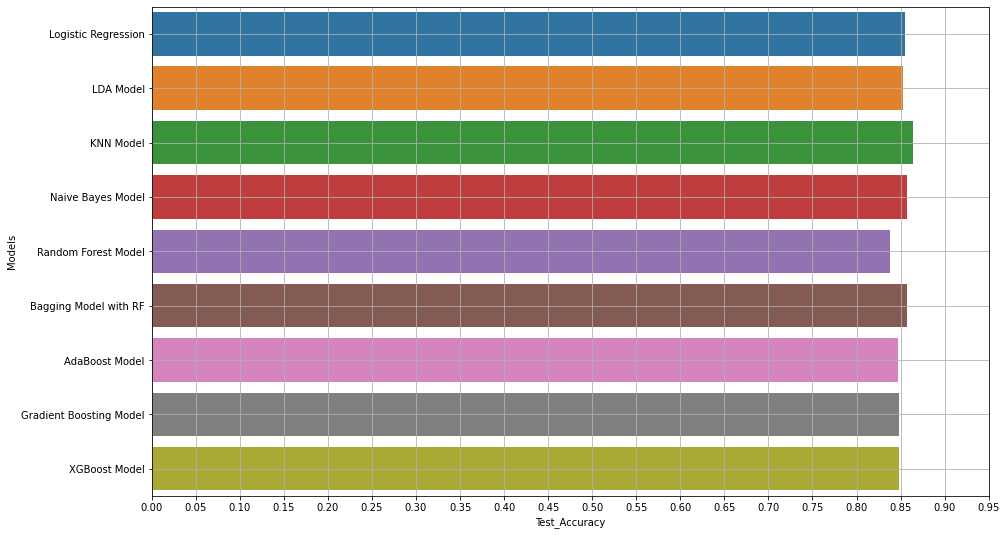

In [233]:
plt.figure(figsize=(15,9))
sns.barplot(y=comp_df.Models,x=comp_df.Test_Accuracy)
plt.xticks(np.arange(0,1,0.05))
plt.grid()

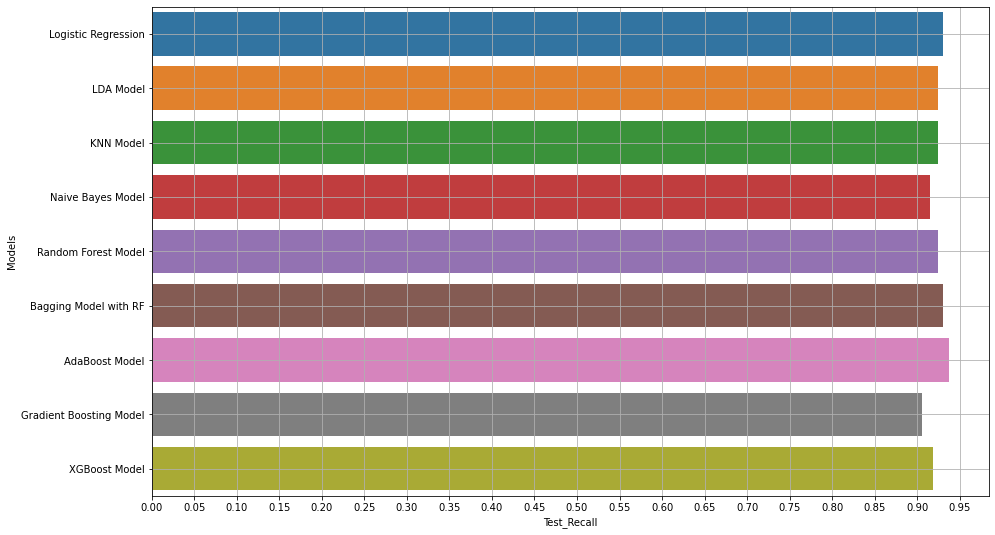

In [234]:
plt.figure(figsize=(15,9))
sns.barplot(y=comp_df.Models,x=comp_df.Test_Recall)
plt.xticks(np.arange(0,1,0.05))
plt.grid()

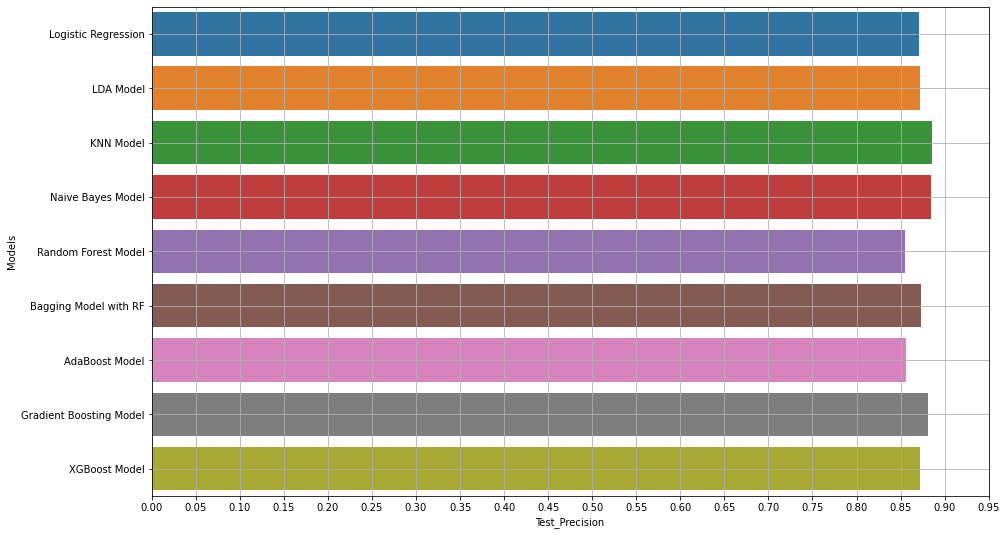

In [235]:
plt.figure(figsize=(15,9))
sns.barplot(y=comp_df.Models,x=comp_df.Test_Precision)
plt.xticks(np.arange(0,1,0.05))
plt.grid()

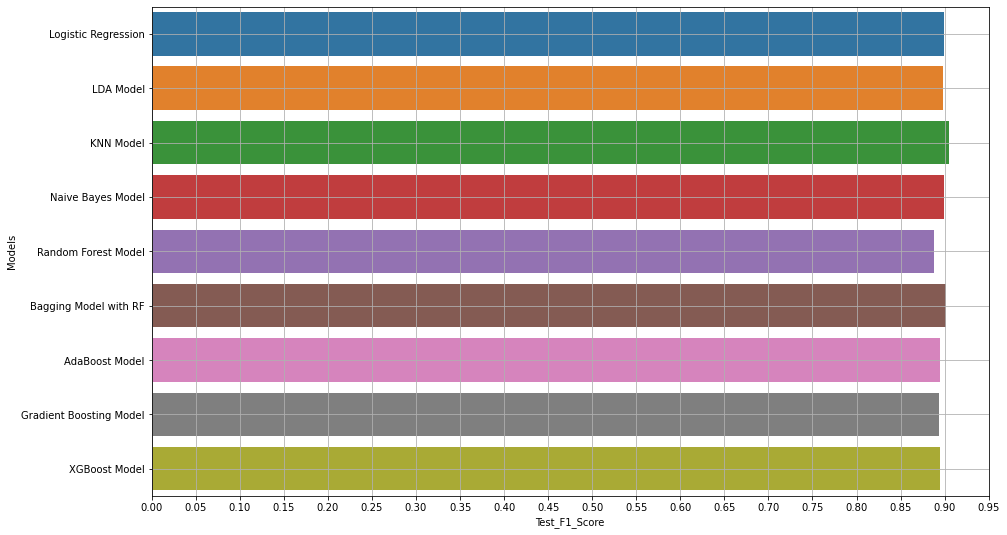

In [236]:
plt.figure(figsize=(15,9))
sns.barplot(y=comp_df.Models,x=comp_df.Test_F1_Score)
plt.xticks(np.arange(0,1,0.05))
plt.grid()

## Problem 2:

In [237]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string
import textstat

from sklearn.feature_extraction.text import TfidfVectorizer

In [238]:
import nltk
#nltk.download('inaugural')
from nltk.corpus import inaugural
from nltk.corpus import words

In [239]:
rs = inaugural.raw('1941-Roosevelt.txt')
kn = inaugural.raw('1961-Kennedy.txt')
nx = inaugural.raw('1973-Nixon.txt')

In [240]:
inaugural.fileids()[:10]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt']

In [241]:
type(rs)

str

In [242]:
for i in [rs,kn,nx]:
    print("Number of characters are ", textstat.char_count(i, ignore_spaces=False))
    print("Number of words are", len(i.split(' ')))
    print("Number of sentences are ", textstat.sentence_count(i))
    print('\n','----------------------------------------------------','\n')

Number of characters are  7571
Number of words are 1323
Number of sentences are  68

 ---------------------------------------------------- 

Number of characters are  7618
Number of words are 1364
Number of sentences are  54

 ---------------------------------------------------- 

Number of characters are  9991
Number of words are 1769
Number of sentences are  70

 ---------------------------------------------------- 



In [243]:
list(string.punctuation)[:12]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',']

In [244]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [245]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [246]:
print("Before removing stopwords and punctuations the number of words in Roosevelt's speech are", len(rs.split(' ')))

Before removing stopwords and punctuations the number of words in Roosevelt's speech are 1323


In [247]:
rs_cleaned = [x for x in rs.lower().split() if x not in stopwords]

In [248]:
rs_cl = []
for token in rs_cleaned:
        if re.search('[a-zA-Z]', token):
            rs_cl.append(token)

In [249]:
rs_cl[:10]

['national',
 'day',
 'inauguration',
 'since',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states.']

In [250]:
print("After removing stopwords and punctuations the number of words in Roosevelt's speech are", len(rs_cl))

After removing stopwords and punctuations the number of words in Roosevelt's speech are 640


In [251]:
print("Before removing stopwords and punctuations the number of words in Kennedy's speech are", len(kn.split(' ')))

Before removing stopwords and punctuations the number of words in Kennedy's speech are 1364


In [252]:
kn_cleaned = [x for x in kn.lower().split() if x not in stopwords]

In [253]:
kn_cl = []
for token in kn_cleaned:
        if re.search('[a-zA-Z]', token):
            kn_cl.append(token)

In [254]:
kn_cl[:10]

['vice',
 'president',
 'johnson,',
 'mr.',
 'speaker,',
 'mr.',
 'chief',
 'justice,',
 'president',
 'eisenhower,']

In [255]:
print("After removing stopwords and punctuations the number of words in Kennedy's speech are", len(kn_cl))

After removing stopwords and punctuations the number of words in Kennedy's speech are 703


In [256]:
print("Before removing stopwords and punctuations the number of words in Nixon's speech are", len(nx.split(' ')))

Before removing stopwords and punctuations the number of words in Nixon's speech are 1769


In [257]:
nx_cleaned = [x for x in nx.lower().split() if x not in stopwords]

In [258]:
nx_cl = []
for token in nx_cleaned:
        if re.search('[a-zA-Z]', token):
            nx_cl.append(token)

In [259]:
print("After removing stopwords and punctuations the number of words in Nixon's speech are", len(nx_cl))

After removing stopwords and punctuations the number of words in Nixon's speech are 843


In [260]:
'us' in stopwords

False

In [261]:
stemmer = SnowballStemmer("english")

In [262]:
stemmer

In [263]:
rs_clean = [stemmer.stem(t) for t in rs_cl]
nltk.FreqDist(rs_clean)

FreqDist({'nation': 11, 'know': 9, 'us': 8, 'life': 7, 'year': 6, 'peopl': 5, 'live': 5, 'human': 5, 'measur': 5, 'men': 5, ...})

In [264]:
kn_clean = [stemmer.stem(t) for t in kn_cl]
nltk.FreqDist(kn_clean)

FreqDist({'let': 16, 'us': 11, 'power': 7, 'new': 7, 'pledg': 7, 'side': 7, 'nation': 6, 'ask': 6, 'shall': 5, 'presid': 4, ...})

In [265]:
nx_clean = [stemmer.stem(t) for t in nx_cl]
nltk.FreqDist(nx_clean)

FreqDist({'us': 25, 'let': 22, 'america': 17, 'new': 15, 'great': 12, 'peac': 11, 'nation': 11, 'world': 9, 'world.': 8, 'respons': 8, ...})

In [266]:
rs_cloud = ' '.join(rs_clean)
kn_cloud = ' '.join(kn_clean)
nx_cloud = ' '.join(nx_clean)

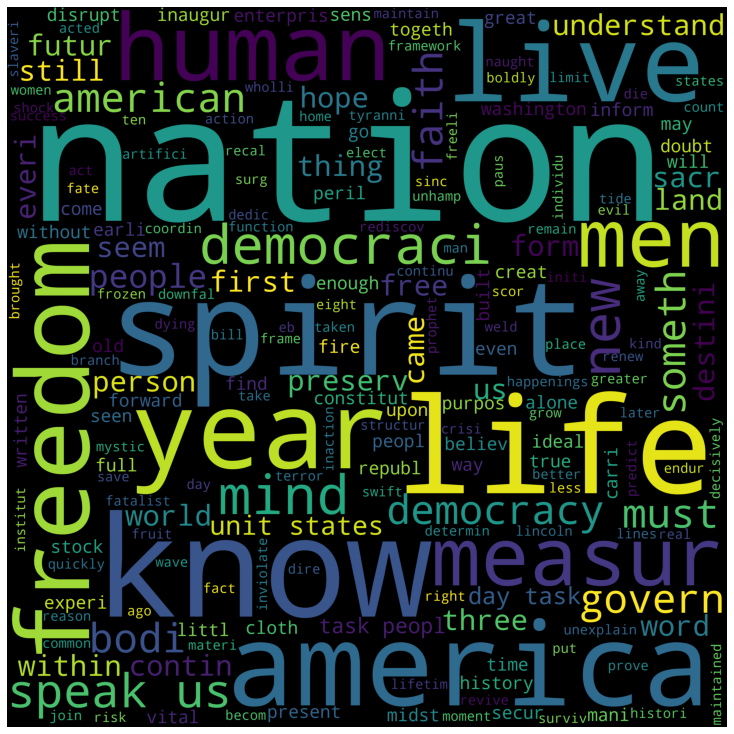

In [267]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(rs_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (18,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.show()


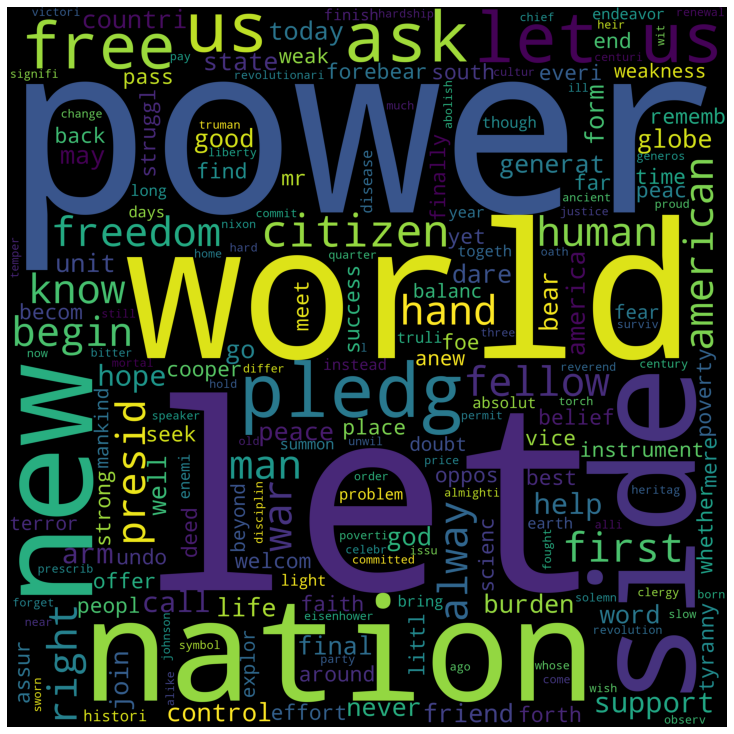

In [268]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(kn_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (18,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.show()

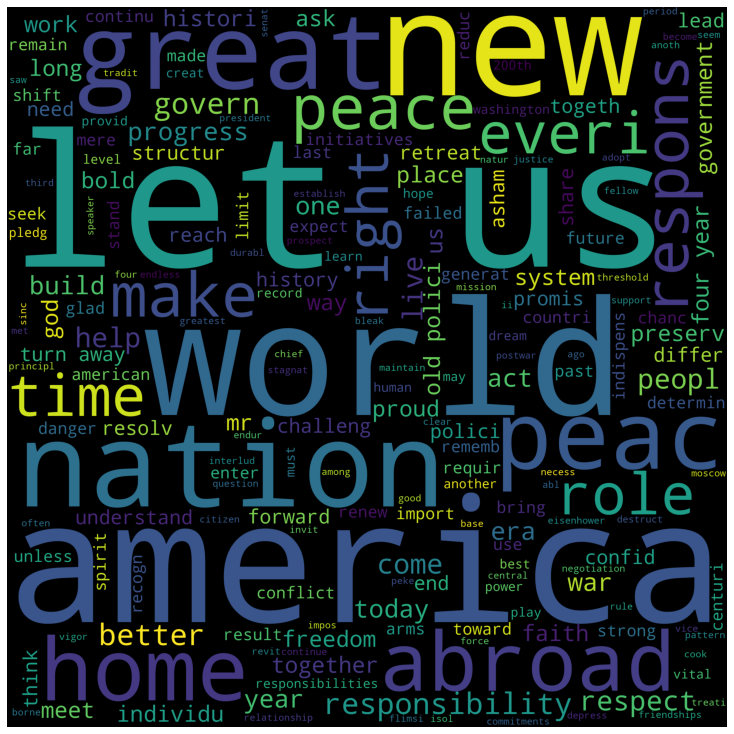

In [269]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(nx_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (18,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.show()